<center>

# Проект для «Викишоп» c BERT
---

</center>

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

__Бизнесс-задача.__<br>
Необходимо обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

__Задача МО.__<br>
Необходимо построить модель со значением метрики качества $F1$ не меньше $0.75$.
1. Загрузить и подготовить данные.
2. Обучить разные модели.
3. Сделать выводы.

__Метрики.__<br>
- Основная метрика $-$ мера $F1$ (не менее $0.75$).
- Метрика оценки адекватности модели $-$ $AUC$-$ROC$.


__Данные.__
- Данные находятся в файле `toxic_comments.csv`.<br>
- Столбец `text` содержит текст комментария, а `toxic` — целевой признак.
- Ссылка на данные: https://code.s3.yandex.net/datasets/toxic_comments.csv

<a id ='table_of_contents'></a>

__Ресурсы.__
- Общее время выполнения проекта на локальном ПК 42 мин.<br> 
- Создание эмбеддингов и признаков модели __toxic-bert__  на GPU платформы __Kaggle__ (16 Гб ).
- Макс. потребляемой памяти ОЗУ: ~18 Гб (для прироста скорости).

__Содержание.__<br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек." data-toc-modified-id="Импорт-библиотек.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек.</a></span></li><li><span><a href="#Установка-параметров-проекта." data-toc-modified-id="Установка-параметров-проекта.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Установка параметров проекта.</a></span></li><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Загрузка-дополнительных-данных." data-toc-modified-id="Загрузка-дополнительных-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка дополнительных данных.</a></span></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Информация-о-данных." data-toc-modified-id="Информация-о-данных.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Информация о данных.</a></span></li><li><span><a href="#Информация-о-данных.-Вывод." data-toc-modified-id="Информация-о-данных.-Вывод.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Информация о данных. Вывод.</a></span></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Удаление-неинформативного-признака." data-toc-modified-id="Удаление-неинформативного-признака.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Удаление неинформативного признака.</a></span></li><li><span><a href="#Очистка-текста." data-toc-modified-id="Очистка-текста.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Очистка текста.</a></span><ul class="toc-item"><li><span><a href="#Список-регулярных-выражений-для-очистки-текста." data-toc-modified-id="Список-регулярных-выражений-для-очистки-текста.-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Список регулярных выражений для очистки текста.</a></span></li><li><span><a href="#Функция-предварительной-очистки-текста." data-toc-modified-id="Функция-предварительной-очистки-текста.-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Функция предварительной очистки текста.</a></span></li><li><span><a href="#Очистка-текста." data-toc-modified-id="Очистка-текста.-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Очистка текста.</a></span></li><li><span><a href="#Очистка-текста.-Вывод." data-toc-modified-id="Очистка-текста.-Вывод.-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Очистка текста. Вывод.</a></span></li></ul></li><li><span><a href="#Фильтрация-и-лемматизация." data-toc-modified-id="Фильтрация-и-лемматизация.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Фильтрация и лемматизация.</a></span><ul class="toc-item"><li><span><a href="#Функция-фильтрации-и-лемматизации-текста." data-toc-modified-id="Функция-фильтрации-и-лемматизации-текста.-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Функция фильтрации и лемматизации текста.</a></span></li><li><span><a href="#Фильтрация-и-лемматизация." data-toc-modified-id="Фильтрация-и-лемматизация.-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Фильтрация и лемматизация.</a></span></li><li><span><a href="#Фильтрация-и-лемматизация.-Вывод." data-toc-modified-id="Фильтрация-и-лемматизация.-Вывод.-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Фильтрация и лемматизация. Вывод.</a></span></li></ul></li><li><span><a href="#Визулизация-лемм." data-toc-modified-id="Визулизация-лемм.-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Визулизация лемм.</a></span><ul class="toc-item"><li><span><a href="#Визуализация-лемм.-Вывод." data-toc-modified-id="Визуализация-лемм.-Вывод.-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Визуализация лемм. Вывод.</a></span></li></ul></li><li><span><a href="#Создание-признаков." data-toc-modified-id="Создание-признаков.-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Создание признаков.</a></span><ul class="toc-item"><li><span><a href="#Признак-оценки-агрессивности-текста." data-toc-modified-id="Признак-оценки-агрессивности-текста.-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Признак оценки агрессивности текста.</a></span></li><li><span><a href="#Эмбеддинги-DistilBERT." data-toc-modified-id="Эмбеддинги-DistilBERT.-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Эмбеддинги <code>DistilBERT</code>.</a></span><ul class="toc-item"><li><span><a href="#Функция-создания-эмбеддингов." data-toc-modified-id="Функция-создания-эмбеддингов.-6.5.2.1"><span class="toc-item-num">6.5.2.1&nbsp;&nbsp;</span>Функция создания эмбеддингов.</a></span></li><li><span><a href="#Создание-эмбеддингов." data-toc-modified-id="Создание-эмбеддингов.-6.5.2.2"><span class="toc-item-num">6.5.2.2&nbsp;&nbsp;</span>Создание эмбеддингов.</a></span></li></ul></li><li><span><a href="#Создание-признков-toxic-bert." data-toc-modified-id="Создание-признков-toxic-bert.-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Создание признков <strong>toxic-bert</strong>.</a></span></li><li><span><a href="#Создание-признаков.-Вывод." data-toc-modified-id="Создание-признаков.-Вывод.-6.5.4"><span class="toc-item-num">6.5.4&nbsp;&nbsp;</span>Создание признаков. Вывод.</a></span></li></ul></li></ul></li><li><span><a href="#Функция-выделения-выборок." data-toc-modified-id="Функция-выделения-выборок.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Функция выделения выборок.</a></span></li><li><span><a href="#Обучение." data-toc-modified-id="Обучение.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обучение.</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-LogisticRegression." data-toc-modified-id="Логистическая-регрессия-LogisticRegression.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Логистическая регрессия <code>LogisticRegression</code>.</a></span><ul class="toc-item"><li><span><a href="#Функция-подбора-гиперпараметров-для-логистическая-регрессии." data-toc-modified-id="Функция-подбора-гиперпараметров-для-логистическая-регрессии.-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Функция подбора гиперпараметров для логистическая регрессии.</a></span></li><li><span><a href="#Логистическая-регрессия-с-векторизацией." data-toc-modified-id="Логистическая-регрессия-с-векторизацией.-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Логистическая регрессия с векторизацией.</a></span></li><li><span><a href="#Логистическая-регрессия-с-эмбеддингами." data-toc-modified-id="Логистическая-регрессия-с-эмбеддингами.-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>Логистическая регрессия с эмбеддингами.</a></span></li><li><span><a href="#Логичстическая-регрессия:-эмбеддинги-и--toxic-bert." data-toc-modified-id="Логичстическая-регрессия:-эмбеддинги-и--toxic-bert.-8.1.4"><span class="toc-item-num">8.1.4&nbsp;&nbsp;</span>Логичстическая регрессия: эмбеддинги и  <strong>toxic-bert</strong>.</a></span></li><li><span><a href="#Логичстическая-регрессия:-toxic-bert." data-toc-modified-id="Логичстическая-регрессия:-toxic-bert.-8.1.5"><span class="toc-item-num">8.1.5&nbsp;&nbsp;</span>Логичстическая регрессия: <strong>toxic-bert</strong>.</a></span></li><li><span><a href="#Логистическая-регрессия.-Вывод." data-toc-modified-id="Логистическая-регрессия.-Вывод.-8.1.6"><span class="toc-item-num">8.1.6&nbsp;&nbsp;</span>Логистическая регрессия. Вывод.</a></span></li></ul></li><li><span><a href="#Градиентный-бустинг-CatBoostClassifier." data-toc-modified-id="Градиентный-бустинг-CatBoostClassifier.-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Градиентный бустинг <code>CatBoostClassifier</code>.</a></span><ul class="toc-item"><li><span><a href="#Функция-обучения-CatBoost." data-toc-modified-id="Функция-обучения-CatBoost.-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Функция обучения CatBoost.</a></span></li><li><span><a href="#Обучение-градиентного-бустинга--без-доп.-признака." data-toc-modified-id="Обучение-градиентного-бустинга--без-доп.-признака.-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Обучение градиентного бустинга  без доп. признака.</a></span></li><li><span><a href="#Градиентный-бустинг.-Предварительный-вывод." data-toc-modified-id="Градиентный-бустинг.-Предварительный-вывод.-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Градиентный бустинг. Предварительный вывод.</a></span></li><li><span><a href="#Обучение-градиентного-бустинга-с-доп.-признаком." data-toc-modified-id="Обучение-градиентного-бустинга-с-доп.-признаком.-8.2.4"><span class="toc-item-num">8.2.4&nbsp;&nbsp;</span>Обучение градиентного бустинга с доп. признаком.</a></span></li><li><span><a href="#Обучение-на-выборке-со-всеми-доп.-признаками." data-toc-modified-id="Обучение-на-выборке-со-всеми-доп.-признаками.-8.2.5"><span class="toc-item-num">8.2.5&nbsp;&nbsp;</span>Обучение на выборке со всеми доп. признаками.</a></span></li><li><span><a href="#Градиентный-бустинг.-Вывод." data-toc-modified-id="Градиентный-бустинг.-Вывод.-8.2.6"><span class="toc-item-num">8.2.6&nbsp;&nbsp;</span>Градиентный бустинг. Вывод.</a></span></li></ul></li><li><span><a href="#Обучение.-Вывод." data-toc-modified-id="Обучение.-Вывод.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Обучение. Вывод.</a></span></li></ul></li><li><span><a href="#Тестирование." data-toc-modified-id="Тестирование.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Тестирование.</a></span><ul class="toc-item"><li><span><a href="#Тестирование.-Вывод." data-toc-modified-id="Тестирование.-Вывод.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Тестирование. Вывод.</a></span></li></ul></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Выводы.</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

 ## Импорт библиотек.

 <a href='#table_of_contents'>К содержанию.</a>

 ---

In [1]:
## perf_copunter для замеров времени.
from time import perf_counter
notebook_time_start = perf_counter()

## os для обращения к среде разработки,
## io, requests для интернет запросов.
import os
from io import BytesIO
import requests

## Работа с датафреймами.
import pandas as pd
## Визуализация.
import matplotlib.pyplot as plt
from matplotlib import rc, ticker as tick
import seaborn as sns
# WordCloud для визуализации.
!pip install wordcloud -q
from wordcloud import WordCloud
## numpy для вычислений.
import numpy as np

## Модули для работы с текстом.
!pip install -U scikit-learn -q
# Векторизация.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# spaCy для токенизации и spacy_fastlang для определения языка.
!pip install spacy -q
import spacy
# Регулярные выражения.
import re

## Модели.
# Логическая регрессия.
from sklearn.linear_model import LogisticRegression
# CatBoost классификатор.
from catboost import CatBoostClassifier, Pool
# пакет torch для работы с нейросетями.
!pip install torch --index-url https://download.pytorch.org/whl/cu118 -q
import torch
# transformers для получения предобученных моделей
import transformers as trans
# создание признаков токсичности текста.
!pip install detoxify -q
from detoxify import Detoxify

## Моддули для работы с моделями.
# Разделение и кросс-валидация.
from sklearn.model_selection import train_test_split, GridSearchCV
# Пайплайны.
from sklearn.pipeline import Pipeline, FunctionTransformer
!pip install imblearn -q
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline_imb
# Метрики.
from sklearn.metrics import (f1_score, precision_score, 
                             recall_score, confusion_matrix, 
                             ConfusionMatrixDisplay,
                             roc_auc_score)
## Дополнительные модули.
# nltk для проверки языка.
import nltk
# tqdm для контроля выполнения ячеек.
from tqdm.notebook import tqdm
from tqdm.contrib.itertools import product
# multiprocessing для оценки кол-ва доступных потоков.
from multiprocessing import cpu_count
# Кастомизация вывода.
from IPython.display import display_html, HTML

## Установка параметров проекта.

<a href='#table_of_contents'>К содержанию.</a>

---

Зададим путь к датасету и другие параметры проекта.

In [2]:
# Зададим путь и название датасета.
DATA_PATH = ('datasets')
DATA_NAME = 'toxic_comments.csv'

# Определим кол-во доступных потоков CPU.
CPU_COUNT = cpu_count() - 1

# Маркер доступноcти GPU.
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Установим начальное значение генератора псевдослучайных чисел.
SEED = 42
np.random.seed(SEED)

# Определим константы.
TARGET = 'toxic'

# Определим пайплайн spaCy.
try:
    nlp = spacy.load("en_core_web_sm")
except:
    spacy.cli.download('en_core_web_sm')
    nlp = spacy.load("en_core_web_sm")
    
# Скачаем словарь nltk.
nltk.download('words')

# Установим стиль отображения заголовков таблиц.
styles = [
    dict(selector = 'caption',
         props = [('text-align', 'center'),
                  ('font-size', '130%'),
                  ('font-weight', 'bold'),
                  ('white-space', 'pre-wrap')]),
    dict(selector = 'th',
         props = [('max-width', '250px')])
    ]

# Установим параметры отображения графиков.
MPL_WIDTH = 15
MPL_HEIGHT = 5
rc('font', size = 14)
figure_kwargs = dict(figsize = (MPL_WIDTH, MPL_HEIGHT),
                     facecolor = 'white',
                     autolayout = True,
                     titlesize = 16)
plt.style.use('seaborn-darkgrid')
rc('figure', **figure_kwargs)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Загрузка данных.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
- Загрузим данные.
- Проверим результат загрузки.

In [3]:
try:
    df = pd.read_csv(DATA_PATH + DATA_NAME)
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/' + DATA_NAME)

df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


## Загрузка дополнительных данных.

 <a href='#table_of_contents'>К содержанию.</a>

 ---

- Также, для дополнения данных, загрузим датасет с обсценными выражениями английского языка.
- Проверим результат загрузки.

In [4]:
spreadsheet_id = '16KIgpYNWUes2ZGheENPqJTX273H4SCE_a781gzYai8k'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
profanities = pd.read_csv(BytesIO(r.content))
profanities.head()

,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
0,69,69,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
1,@55,ass,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
2,@ssfcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
3,@ssfucker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
4,@ssfvcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.4,Strong


- Для создания доп. признака оценки обсценной лексики в тексте понадобятся только признаки `text` и `severity_description`. 
- Сбросим остальные признаки и проверим результат.

In [5]:
profanities = profanities[['text', 'severity_rating']]
profanities.head()

,text,severity_rating
0,69,1.0
1,@55,1.0
2,@ssfcker,2.8
3,@ssfucker,2.8
4,@ssfvcker,2.4


## Анализ данных.

<a href='#table_of_contents'>К содержанию.</a>

---

- Создадим функции вывода информации и проверки языка текстов.
- Выведем информацию и первые $10$ строк данных.
- Проведём предварительный анализ данных.

### Информация о данных.

<a href='#table_of_contents'>К содержанию.</a>

---
Создадим функции вывода информации и проверки языка текстов.

In [6]:
# Функция вывода информации о данных.
def get_eda_data(data : pd.DataFrame, target : str = TARGET) -> None:
    display(data
            .head(30)
            .style
            .set_caption('Первые 30 строк датафрейма.')
            .set_table_styles(styles))
    display(data
            .sample(10, random_state = SEED)
            .style
            .set_caption('Сэмпл №1. 10 строк датафрейма.')
            .set_table_styles(styles))
    display(data
            .sample(10, random_state = SEED+10)
            .style
            .set_caption('Сэмпл №2. 10 строк датафрейма.')
            .set_table_styles(styles))
    display(data
            .tail(10)
            .style
            .set_caption('Последние 10 строк датафрейма.')
            .set_table_styles(styles))
    print('\n\033[1m- Названия столбцов: '+
      f'{str(list(data.columns)).strip("[]")}')
    print('\n\033[1m- Количество явных дубликатов: '+
          f'{data.duplicated().sum()}.\033[0m')
    print('\n\033[1m- Кол-во значений по классам: \033[0m\n'+
          f'{data[target].value_counts()}')
    print('\n\033[1m- Информация о датафрейме:\033[0m')
    data.info()
    print('\n')
    

# Функция проверки английского.#### Функция проверки языка.
def check_language(data : pd.Series) -> None:
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())

    def nltk_compare(data : pd.Series):
        text_vocab = set(w.lower() for w in data if w.lower().isalpha())
        unusual = text_vocab.difference(english_vocab)
        language = ('английский' if len(unusual) == 0 else 'другой')

        return language
    
    language = data.apply(nltk_compare) 
    print('\n\033[1m- Определённые языки:\033[0m')
    display(language
            .value_counts(normalize=True)
            .map('{:.3%}'.format)
            .head())

Выведем 
- информацию;
- первые $30$ и последние $10$ строк данных;
- случайные срезы данных по $10$ строк;
- результат проверки языка.

In [7]:
get_eda_data(df)
check_language(df.text)

,Unnamed: 0,text,toxic
0,0,"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,3,""" More I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know. There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0
5,5,""" Congratulations from me as well, use the tools well. · talk """,0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0
8,8,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0
9,9,alignment on this subject and which are contrary to those of DuLithgow,0


,Unnamed: 0,text,toxic
31015,31055,"Sometime back, I just happened to log on to www.izoom.in with a friend’s reference and I was amazed to see the concept Fresh Ideas Entertainment has come up with. So many deals… all under one roof. This website is very user friendly and easy to use and is fun to be on. You have Gossip, Games, Facts… Another exciting feature to add to it is Face of the Week… Every week, 4 new faces are selected and put up as izoom faces. It’s great to have been selected in four out of a group of millions. This new start up has already got many a deals in its kitty. Few of them being TheFortune Hotel, The Beach… are my personal favorites. izoom.in has a USP of mobile coupons. Coupons are available even when a user cannot access internet. You just need to SMS izoom support to 56767 and you get attended immediately. All I can say is izoom.in is a must visit website for everyone before they go out for shopping or dining or for outing. Cheers!!!",0
102832,102929,""" The latest edit is much better, don't make this article state """"super."""" at all. 71.237.70.49 """,0
67317,67385,""" October 2007 (UTC) I would think you'd be able to get your point across, and be immune to any objections, were you to simply embellish the second sentence of the article by changing """"he was schooled at Thornleigh Salesian College"""" to """"he was schooled at (the then all-Catholic) Thornleigh Salesian College"""". Good suggestion from an Anon - what do you think? Rgds, - 07:53, 5""",0
81091,81167,Thanks for the tip on the currency translation. Think it's all done now.,0
90091,90182,"I would argue that if content on the Con in comparison to the Arts Music is out of proportion, then it warrants further contribution to the article, not the removal of an indepth piece of content. Also, as I mentioned before, the Arts Music unit has a notable history comparable to that of the Con itself. Because of this, I would further argue that content on the Arts Music Unit is more relevant to this article than the information on the Newcastle Conservatorium.",0
1860,1860,"""=Reliable sources=== Cheating: """"Barry Bonds:Cheater"""" from CBS, yea I kinda think that is reliable. """"Dear Barry Bonds, You are either an outright cheater or very stupid"""" from the USA Today """"Yes, Barry Bonds is a cheater. He is a cheater of the worst sort"""" Lying: """"It's clear, Barry Bonds' a liar"""" New York Daily News, another pretty freakin' reliable source. """"Barry Lamar Bonds is a bad man"""" Baseball Digest """"but Bonds is a liar, a cheater, a whiner and a bad influence on America's youth"""" Mark Barnes ==""",1
125293,125422,WTF= How The Fuck Does This Person Merit A Page On Wikipedia.,1
148986,149142,"cajuns, acadians Cajuns, acadians, louisianans, they're so many different names for different americans of french descent because their culture is so rich and somewhat so different but so close at the same time. I'm an acadian but more importantly I'm a french american so I really don't see why there should be a difference. If you say there should be two different list, it doesn't make sense. The people on the french-american list should be in one of wiki-invented list of cajuns or acadians. I understand there are some more recent french-americans who are only 1 or 2 generations-old americans but this distinction isn't made for italian-americans, german-americans. I'm surprised to see Albert Einstein a fairly recent immigrant in American history next to Katherine Heigl, a 10 to 12 generations american. \\ This is all race-based, biased because french-bashing don't stop at the bush government level.",0
89697,89784,"Hi - I dropped a pin in Google Maps at the ceremonial site near Chief Tayak's grave and recorded the lat/long. Is this not permitted? It maps correctly in other sites, as well, so I believe they're the correct coordinates. I live nearby, so could also visit the site and get the coordinates from GPS.",0
64256,64323,Re removal of accessdate= fo

,Unnamed: 0,text,toxic
91339,91430,"Thank you for your answer. However, I shall wait for Doc's one, before giving my opinion on the matter.",0
69785,69854,"It doesn't make any difference anyway Spartaz. Corrupt, rude and dishonest admins do what they want here anyway, just look at the sections above. But here was the start of our discussion which, despite my polite request, quickly devolved into assumptions of bad faith on your part and extraordinary rudeness by you. Unless I am mistaken it ended with you requesting I not post on your talkpage. Unlike the worms and trolls emerging here on my page, I had no problem complying. I don't like hanging around creeps. I did post once when I saw you closed an AfD as delete when they only comments were in favor of keeping, but then I remembered who you were and removed my comment. Another editor took your inappropriate action to DRV where it was overturned. So again, yes, you are rude, yes, you are involved, yes you are a bad admin, yes you are a consistenet policy violator, yes you are a hypocrite who asks an editor to steer clear but has no problem going after that same editor at your first opportunity, but nevermind. That kind of abusive stupidity and harassment seems to be quite common here.",1
9027,9040,"OH...Top Gear did call it a supercar, I am very surprised. It's too cheap to be a supercar IMO.",0
130531,130667,"Yes well Personally, I think that Chun Li has attacks that are used but re named in other characters. Such as Ling from Tekken. But thats my view. I still think girls with that sort of Power under them have the respect. Despite being a Cartoon fighter. =====))))) Hadoken!",0
58248,58312,""" The article is incomplete Well written and interesting. Good. I think the article would benefit from identifying the former bands of the members. What I find frustrating is that the article seems to assume knowledge of UK indie music. Why is it a supergroup? Who is Damon Albarn? Paul Simonon? Tony Allen? Simon Tong? I knew Damon, but I had to click 3 more links to find out the others. As an international wiki, anyone outside the UK will have no idea who these people are. The article should explain to anyone assuming no prior knowledge. Mention and link to the Clash, the Verve, Blur etc as well. After all, this is meant to be an encyclopaedia. It's not an article in NME, and space isn't an issue. Identifying the history of the members and explaining why it was considered a """"supergroup"""" is surely relevant to the article. On another note - I only noticed who produced the album was here when I returned to it and looked at the top right side panel. I was expecting to find this at the bottom under the list of personnel. On my first visit I had to click other links to be certain that Danger Mouse had done it. Hope that didn't sound too much of a complaint. """,0
145237,145393,"No, I'm not wrong on them. I'm telling the truth. Please? Change Piccolo Jr.'s biography and information back to the way it was I had written it? PLEASE? Think about it. 75.22.138.39",0
122975,123081,"Again, I have no abusive accounts. One rant against another problem user does not an abuser make. As for blocking freepripper or jefferyneave (as I see I'm accused of being him now too) that's up to them if they want to take issues to a higher authority. I'm sorry you two. All I try to do on wiki is make sure articles are true, balanced and well written and right now I'm feeling quite, I can't even describe it. For my part, wiki authorities have been contacted to let them know the situation. I regret that someone pushed my button enough that I grew upset and I see already that some are watching my every post now. I will continue to provide truth to articles, I will keep my cool and I will not post on others talk pages unless they are friends.",0
99950,100047,Tragic new developments on my talk page. Regards –,0
47070,47125,""" Wikipedia Fakes It Again For the several dozenth time, Wikipedia's fakers have """"warned"

,Unnamed: 0,text,toxic
159282,159441,""" No he did not, read it again (I would have thought everyone here could recite it by heart by now) it says """"Are we truly to believe the arbcom are so thankful for that, and Jimbo was ever so taken with her"""". The arbcom having read the evidence are now voting to thank her - so it is a very valid question. Kelly always implied she was a friend of Jimbo's. Good for her, that must be very pleasant for them both. However, I can't imagine Jimbo was particularly impressed by that blog either. If you actually read the blog, not just what was pasted to wiki, there is a lot of information on her views in other areas. I was also commenting on those. I don't imagine Jimbo is much impressed by me or many others concerned with whole rotten case either, but it's all a bit late for those concerns now. Now this is actually Bishonen's page, so my further views will be posted on my own page, if I decide to post them that is, because I too am heartily sick of this whole case, it is just a pity reference to that blog was ever permitted as evidence, especially if people do not in fact want to discuss it or here concerned parties views on it. """,0
159283,159442,""" Auto guides and the motoring press are not good sources for an encyclopedia article about """"luxury vehicle"""". This is because automakers feed the press a lot of BS (Boastful Superlatives) who then work hard to write articles adding even more BS to describe their products. The press earns credits from the hands that feed them. Add to this the fact that potential and actual purchasers of luxury vehicles have an insatiable appetite for this type of BS. Classifying a particular vehicle as """"luxury"""" is also designed to easily make it superior to other vehicles even if the differences are superficial. Using self-serving BS in marketing claims is a very, very old invention that helps sell products, as well as fuel the fan base with """"bragging"""" rights to which vehicles are """"luxury"""". On the other hand, it is more difficult for most marketers to be humble and genuine. That is why an encyclopedia article has to avoid falling into the trap of using traditional marketing superlatives and hyperbole. — """,0
159284,159443,""" please identify what part of BLP applies because BLP clearly states that we must follow NPOV which says that we must present content in relation to the manner the subject is covered in reliable academic sources. In this case there has not been any substantial mainstream academic sources provided which is not critical of views and claims that Chopra makes. TRPoD aka The Red Pen of Doom """,0
159285,159444,Catalan independentism is the social movement involving more people in Catalonia. Votes in the referendum at Barcelona were more than the ones received by political parties that are leading the council (PSC and CIU) . 20% of votes of the total census voting in favour of a referendum that is forbidden by spanish courts and that has no legal effects is highly relevant.,0
159286,159445,"The numbers in parentheses are the additional decimal points which have been measured but lie outside the accuracy of the measurement process. This means the values in the parentheses eg (15) could be used for the purpose of calculation, but any value that results from such a calculation would not be more accurate than the number of significant figures if those in parentheses were not considered. In other words, the values in parentheses are there to help avoid rounding errors if you’re trying to work to the limit of accuracy of the gas constant. I agree that this is not commonly known, and only confuses the issue. I would recommend removing it.",0
159287,159446,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most signi


- Названия столбцов: 'Unnamed: 0', 'text', 'toxic'

- Количество явных дубликатов: 0.

- Кол-во значений по классам: 
0    143106
1     16186
Name: toxic, dtype: int64

- Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB



- Определённые языки:


английский    97.574%
другой         2.426%
Name: text, dtype: object

### Информация о данных. Вывод.

<a href='#table_of_contents'>К содержанию.</a>

---

- __Данные.__
  - Данные представлены двумя признаками: 
    - содержащим текстовые записи признаком `text`, 
    - и разметкой токсичности - признаком `toxicity`. <br>
  - Также в данных присутствует столбец с порядковыми номерами объектов, который необходимо удалить, т.к. он не несёт полезной информации.
  - В данных содержится $159292$ объекта.
  - Текст содержит сокращения (e.g.: $"you'd"$), тэги имени (e.g.: *@name*), гиперссылки и пр. аномалии, которые необходимо обработать.
  - Основной язык текстов - Анлглийский.
  
- __Целевой признак.__
  - Целевой признак бинарен.
  - Классы несбалансированы, что необходимо учесть при моделировании:
    - негативных/токсичных объектов, принадлежащих классу `1`: 16186;
    - позитивных объектов, принадлежащих классу `0`: 143106.
  
- __Задача МО.__
  - Задача машинного обучения - бинарная классификация текста с оптимизацией метрики $F1$.
  
- __Пропуски и дубликаты.__
  - Пропусков и явных дубликатов в данных не обнаружено.
  - Необходима проверка явных дубликатов после удаления признака с порядковыми номерами.



## Подготовка данных.

<a href='#table_of_contents'>К содержанию.</a>

---
- Удалим неинформативный признак `Unnamed: 0` и проверим наличие явных дубликатов.
- Очистим текстовые объекты от шума и приведём сокращённые формы:
  - удалим ссылки, разметку CSS и HTML и пр.;
  - удалим именные тэги `@` и имёна следующие за ними, а также спецразметку типа `Wikipedia_talk:WikiProject_` и пр.;
  - "расшифруем" стандартные сокращения англ. языка типа $"can't"$,
  - удалим повторения символов более $2$, т.к. в английском языке таких повторов нет.

### Удаление неинформативного признака.

<a href='#table_of_contents'>К содержанию.</a>

---
- Удалим признак `Unnamed: 0`.
- Проверим результат.

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(f'Количество явных дубликатов после удаления: {df.duplicated().sum().sum()}')
df.head()

Количество явных дубликатов после удаления: 0


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


### Очистка текста.

<a href='#table_of_contents'>К содержанию.</a>

---
- Зададим список регулярных выражений для очистки текста.
- Зададим функцию предварительной очистки текста.

#### Список регулярных выражений для очистки текста.

In [9]:
# Зададим регулярные выражения для замены.
replacements = [
    # Гиперссылки.
    ('\<a href\S+', ''),
    ('http\S+', ''),
    ('www.\S+', ''),
    ('://\S+', ''),
    # Именные теги и спец. разметка.
    ('@\S+' , ''),
    ('Wikipedia_talk:WikiProject_\S+', ''),
    ('(talk\|email)|\b(talk • contribs • )|\b'+
     '(talk contribs )|talk contribs|\(talk\)', ''),
    # Разметка CSS / HTML.
    ('\n', ' '),
    ('width=""100%""\S+',  ''),
    ('style=""\S+', ''),
    # Общие сокращения англ. языка.
    (' @ ' , 'at'),
    ("won\'t", "will not"),
    ("wtf", "what the fuck"),
    ("can\'t", "can not"),
    ("\'re", " are"),
    ("\'s", " is"),
    ("\'d ", " would "),
    ("\'ll", " will"),
    ("n\'t", " not"),
    ("\'ve", " have"),
    ("\'d've", " would have"),
    ("\'m", " am"),
    # Повторяющиеся более 2-ух раз символы.
    (r"(\S)(?=\1{2,})", '')]

#### Функция предварительной очистки текста.
Создадим функцию, которая
- примет столбец данных маркер пропуска знаков препинания и апострофов;
- переведёт строки в нижний регистр;
- удалит и заменит указанные последовательности символов;
- заменит повторы пробелов на один;
- вернёт изменённый столбец.

In [10]:
# Функция предварительной очистки текста.
def clean_text(data : pd.Series, 
               replacements : list[tuple] = replacements, 
               partial: bool = False) -> pd.Series:

    data = data.copy()
    skip_list = [("won\'t", "will not"),
                ("wtf", "what the fuck"),
                ("can\'t", "can not"),
                ("\'re", " are"),
                ("\'s", " is"),
                ("\'d ", " would "),
                ("\'ll", " will"),
                ("n\'t", " not"),
                ("\'ve", " have"),
                ("\'d've", " would have"),
                ("\'m", " am")]
    if partial:
        replacements = [x for x in replacements if x not in skip_list]
        sub = "[^a-zA-Z ,.'`]"
    else:
        sub = "[^a-zA-Z ]"

    # Обработка текста и очистка от гиперссылок и пр.
    data = data.str.lower()   
    for repl in replacements:        
        data = data.str.replace(*repl, regex = True)
    data = data.str.replace(sub, ' ', regex = True)
    data = data.apply(lambda x: ' '.join(x.split()))

    return data

#### Очистка текста.
- Вызовем функцию и очистим текст.
- Дополнительно частично очистим текст, оставив знаки препинания и апострофы.
- Проверим результат.

In [11]:
%%time
df['text_cleaned'] = clean_text(df.text)

with pd.option_context('display.max_colwidth', None):
    display(df[df.text.str.contains('http')].head(1), 
            df[df.text.str.contains('ooooooo')].head(1))

,text,toxic,text_cleaned
22,"""\n\n Snowflakes are NOT always symmetrical! \n\nUnder Geometry it is stated that """"A snowflake always has six symmetric arms."""" This assertion is simply not true! According to Kenneth Libbrecht, """"The rather unattractive irregular crystals are by far the most common variety."""" http://www.its.caltech.edu/~atomic/snowcrystals/myths/myths.htm#perfection Someone really need to take a look at his site and get FACTS off of it because I still see a decent number of falsities on this page. (forgive me Im new at this and dont want to edit anything)""",0,snowflakes are not always symmetrical under geometry it is stated that a snowflake always has six symmetric arms this assertion is simply not true according to kenneth libbrecht the rather unattractive irregular crystals are by far the most common variety someone really need to take a look at his site and get facts off of it because i still see a decent number of falsities on this page forgive me im new at this and dont want to edit anything


,text,toxic,text_cleaned
3745,buttdaddy \n\nooooooooh yeah i'm your dad now,0,buttdaddy ooh yeah i am your dad now


CPU times: total: 13 s
Wall time: 13.1 s


In [12]:
%%time
df['text_cleaned_partial'] = clean_text(df.text, partial=True)

with pd.option_context('display.max_colwidth', None):
            display(df[df.text.str.contains(',')].head(1))

,text,toxic,text_cleaned,text_cleaned_partial
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now,"explanation why the edits made under my username hardcore metallica fan were reverted they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now. . . ."


CPU times: total: 10.5 s
Wall time: 10.5 s


#### Очистка текста. Вывод.
- Данные очищены от шумовых последовательностей.

### Фильтрация и лемматизация.

<a href='#table_of_contents'>К содержанию.</a>

---
- Удалим стоп-слова и леммматизируем текст.<br>
Для удаления стоп-слов и лемматизации текста используем "среднюю" модель библиотеки __spaСy__: `en_core_web_md`. __spaCy__, например, должна определить по окружению и не лемматизировать `dated` -  "устаревший", прилагательное, но лемматизировать глагол прошедшего времени `dated`, "встречалась".

#### Функция фильтрации и лемматизации текста.
Создадим функцию, которая
- примет датафрейм b размер батча для обработки на итерации;
- отфильтрует стоп-слова и лемматизирует текст;
- создаст или заменит столбец с преобразованным текстом;
- создаст столбец с языком для каждого объекта.

In [13]:
# Функция фильтрации и лемматизации.
def lemmatize_(data : pd.DataFrame,
            text_col : str = 'text',
            drop_orig : bool = True,
            cpu_count : int = 1,
            **kwargs) -> None:
    '''
    Функция фильтрует стоп-слова и лемматизирует текстовый массив 
    английского языка. Функция добавляет/заменяет заданный столбец 
    результатом.
     **kwargs принимает batch_size
    '''

    # Фильтрация и лемматизация.
    corpus = []
    print('Начало фильтрации и лемматизации...')
    for doc in tqdm(
        nlp.pipe(data[text_col],
                 n_process=cpu_count,
                 **kwargs),
        total = data[text_col].shape[0]
    ):
        filtered_lemma = []
        for w in doc:
            if not any([w.is_stop]):
                filtered_lemma.append(w.lemma_)

        doc_ = ' '.join(filtered_lemma)
        corpus.append(doc_)

    data['text_lemm'] = corpus

    # Сброс оригинального столбца при необходимости.
    if drop_orig:
        data.drop(text_col, axis=1, inplace=True)

#### Фильтрация и лемматизация.

- Вызовем функцию: отфильтруем стоп-слова и лемматизируем текст.
- Проверим результат.

In [14]:
%%time
lemmatize_(df, text_col='text_cleaned',
                          cpu_count=CPU_COUNT,
                          batch_size=512)
df.head()

Начало фильтрации и лемматизации...


  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: total: 3min 53s
Wall time: 4min 38s


,text,toxic,text_cleaned_partial,text_lemm
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation edit username hardcore metallica f...
1,D'aww! He matches this background colour I'm s...,0,d'aww he matches this background colour i'm se...,d aww match background colour seemingly stuck ...
2,"Hey man, I'm really not trying to edit war. It...",0,"hey man, i'm really not trying to edit war. it...",hey man try edit war guy constantly remove rel...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can't make any real suggestions on impr...,real suggestion improvement wonder section sta...
4,"You, sir, are my hero. Any chance you remember...",0,"you, sir, are my hero. any chance you remember...",sir hero chance remember page


#### Фильтрация и лемматизация. Вывод.
- Данные очищены от многих шумовых элементов и стоп-слов и лемматизированны.

### Визулизация лемм.

<a href='#table_of_contents'>К содержанию.</a>

---
- Построим графики облаков слов для всех классов и посмотрим на самые популярные слова, чтобы сравнить со словами важными для моделей.
- Построим гистограммы длин текста, для оценки возможных тенденций.

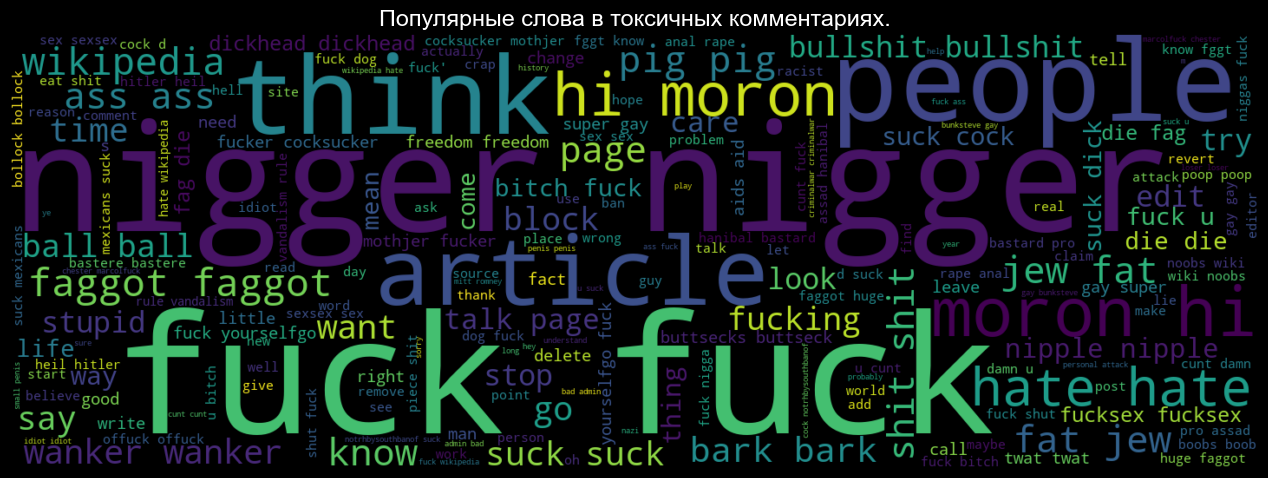

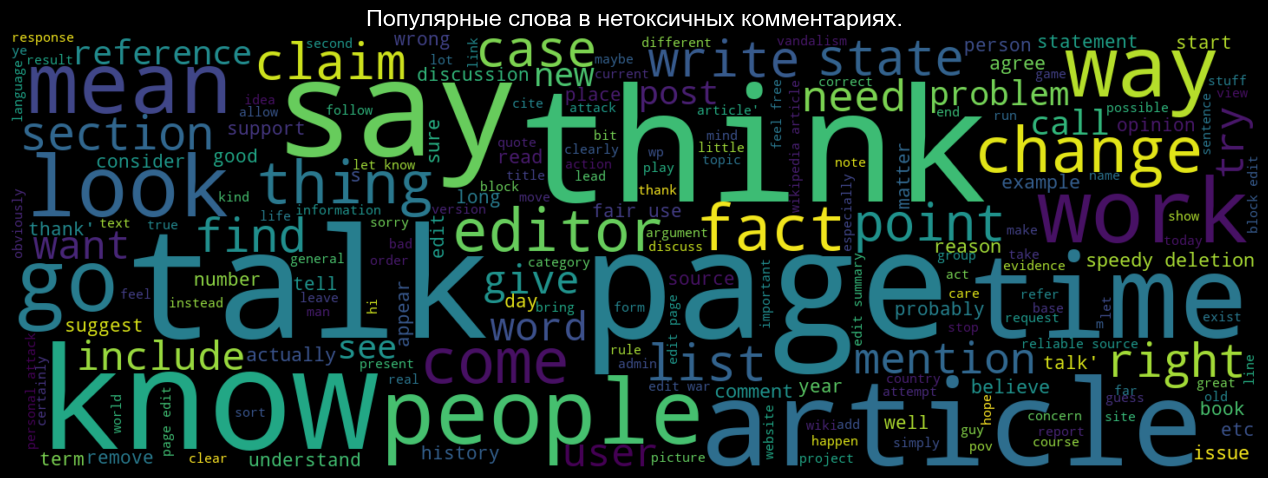

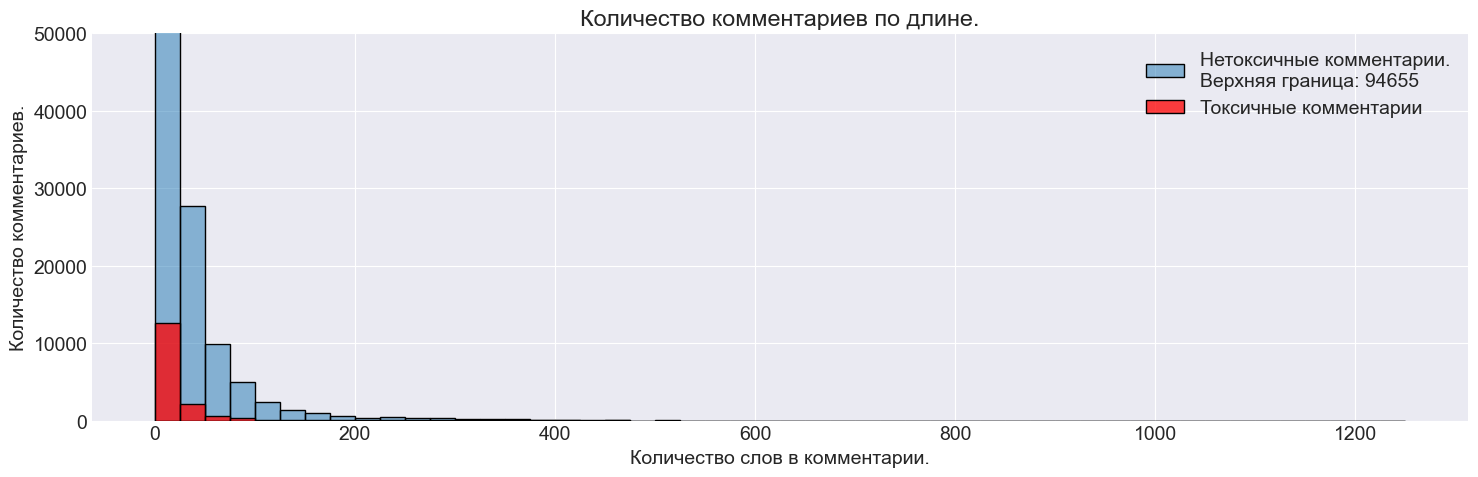

In [15]:
# Выведем облака слов.
for text, title in zip([str(set(df.loc[df['toxic'] == 1, 'text_lemm'])),
                        str(set(df.loc[df['toxic'] == 0, 'text_lemm']))],
                        ['Популярные слова в токсичных комментариях.',
                        'Популярные слова в нетоксичных комментариях.']):
    wordcloud = WordCloud(width=1440, height=500).generate(text)
    plt.figure(figsize=(MPL_WIDTH, MPL_HEIGHT), facecolor='k')
    plt.title(title, color='white')
    plt.imshow(wordcloud ,interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout(pad=0)
    plt.show();
    
# Вычислим кол-ва комментариев по классам.
toxic_counts = df.loc[df['toxic'] == 1, 'text_lemm'].str.split().str.len()
normal_counts = df.loc[df['toxic'] == 0, 'text_lemm'].str.split().str.len()

# Построим и выведем гистограмму.
sns.histplot(x=normal_counts, bins=50, alpha=.5)
plt.ylim(top=50000)
sns.histplot(x=toxic_counts, bins=50, color='red')
plt.title('Количество комментариев по длине.')
plt.legend([f'Нетоксичные комментарии.\nВерхняя граница: '+
            f'{int(normal_counts.value_counts(bins=[0,25]))}', 
            'Токсичные комментарии'])
plt.xlabel('Количество слов в комментарии.')
plt.ylabel('Количество комментариев.')
plt.show();

#### Визуализация лемм. Вывод.
- Токсичные комментарии.<br>
  - Токсичные комментарии не блещут оригинальностью. Единственный вывод: модель, посчитавшая самые поулярные слова на диаграмме облака слов важными, лучше предскажет класс токсичных комментариев.
- Нетоксичные комментарии.
  - Основные слова отличаются от популярных слов положительного класса, что может упростить задачу моделям.
- Гистограмма не показала существенных различий в распределении количества слов двух классов.


### Создание признаков.

<a href='#table_of_contents'>К содержанию.</a>

---

- Созадим признак оценки агрессивности текста.
- Загрузим, созданные на платформе __Kaggle__ эмбеддинги __DistilBERT__.

#### Признак оценки агрессивности текста.
- Сопоставим тексты из основного датафрейма и дополнительно скачнного каталога и создадим признак с оценкой уровня агрессивности обсценных выражений в тексте.
- Удалим датафрейм с оценками агрессивности.
- Проверим результат.

In [16]:
%%time
# Сопоставим столбцы.
df['offense_score'] = np.zeros(df.shape[0])
for i, row in tqdm(profanities.iterrows(), total=profanities.shape[0]):
    df.loc[df.text_lemm.str.contains(f" {row['text']} "), 'offense_score'] = row['severity_rating']
    
# Проверим результат.
print('\033[1m- Количество выражений, сопоставленных с основным корпусом: '+
      f'{(df["offense_score"] != 0).sum()}\033[0m')
print('\n\033[1m- Количество выражений, сопоставленных с классом 1, '+
      'токсичными текстами: '+
      f'{df.query("offense_score > 0 & toxic == 1")["text"].count()}\033[0m')
display(df
        .query('offense_score > 0 & toxic == 1')
        .head()
        .style
        .set_caption('Первые 5 строк с оценками выражений и классом 1.')
        .set_table_styles(styles))

  0%|          | 0/1598 [00:00<?, ?it/s]

- Количество выражений, сопоставленных с основным корпусом: 8680

- Количество выражений, сопоставленных с классом 1, токсичными текстами: 5980


,text,toxic,text_cleaned_partial,text_lemm,offense_score
42,"You are gay or antisemmitian? Archangel WHite Tiger Meow! Greetingshhh! Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone... 1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings! 2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals! 3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore! Beware of the Dark Side!",1,"you are gay or antisemmitian archangel white tiger meow greetingshh uh, there are two ways, why you do erased my comment about ww , that holocaust was brutally slaying of jews and not gays gypsys slavs anyone.. if you are anti semitian, than shave your head bald and go to the skinhead meetings if you doubt words of the bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals first and last warning, you fucking gay i won't appreciate if any more nazi shwain would write in my page i don't wish to talk to you anymore beware of the dark side",gay antisemmitian archangel white tiger meow greetingshh uh way erase comment ww holocaust brutally slay jews gay gypsys slavs anti semitian shave head bald skinhead meeting doubt word bible homosexuality deadly sin pentagram tatoo forehead satanistic masse gay pal warn fucking gay appreciate nazi shwain write page wish talk anymore beware dark,2.200000
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,"fuck your filthy mother in the ass, dry",fuck filthy mother ass dry,1.000000
55,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1,stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell,stupid peace shit stop delete stuff asshole die fall hole hell,1.200000
58,"My Band Page's deletion. You thought I was gone. Deleting the comment I posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. You, sir, are still a cock-sucking douche fuck. Sit back for a second and think about what your life has become. ............ Done? That didn't take long did it? Nope. Because, as I am most certainly aware, your life is a shitstorm of sitting in front of the computer masturbating to fictional creatures. Your attempts to get rid of me are mediocre at best. You are constantly sucking the dick of failure. You don't want a personal attack, huh? Well, too bad, Fuckcock McDickerson. You've got one. From me. You can go ahead and delete my profile from wikipedia. I'll just make another one and come right back to 'Syrthiss's talk page and insult the dick off of you. How could you shatter the dreams of an innocent eighteen year old college freshman trying to make a name for his band. Does that make you happy? Fucking with people because you're an overweight, single, old man in a dead-end job. Did you spot that perhaps someone else was going to follow his dreams and you were trying to hold him back so somebody else could suffer like you? Yes you did. I don't make empty threats, so I won't be saying anything along the lines of 'i'll hurt you' or 'i'll eat the children from within your sister's womb', but I will say that you are a asshole, son-of-a-bitch, mother fucking cock sucker. So, go eat some more food and drown your sorrows you premature ejaculating, bald headed fuck. You should do something nice for yourself, maybe go grab a couple of Horny Goat Weeds from your local convenience store and jack off for a little longer than three minutes tonight. Sincerely, An Asshole That's Better Than You In Every Way.",1,"my band page's deletion. you thought i was gone. deleting the comment i posted on your 'talk page' does not delete my feelings for your

CPU times: total: 4min 9s
Wall time: 4min 9s


- Сбросим столбец с оригинальным текстом, который более не понадобится.
- Проверим результат.

In [17]:
df.drop(['text', 'text_cleaned_partial'], axis=1, inplace=True)
del profanities
df.head()

,toxic,text_lemm,offense_score
0,0,explanation edit username hardcore metallica f...,0.0
1,0,d aww match background colour seemingly stuck ...,0.0
2,0,hey man try edit war guy constantly remove rel...,0.0
3,0,real suggestion improvement wonder section sta...,0.0
4,0,sir hero chance remember page,0.0


#### Эмбеддинги `DistilBERT`.
- Из локальной папки загрузим эмбеддинги (~480 мб.), созданные на платформе __Kaggle__ c использованием модели `DistilBERT`, которая по словам разработчиков, на 40% легче, на 60% быстрее и сохраняет 97% объяснительной способности родительской модели `BERT`.
- Использовались веса для слов без регистра `distilbert-base-uncased`.
- Код функции формирования эмбеддингов и определения модели и весов приведён ниже.

##### Функция создания эмбеддингов.
Код функции , которая
- принимает на вход
  - столбец с текстами;
  - токенизатор;
  - модель;
  - размер батча;
  - метку вывода информации о ходе работы.
- создает и выводит матрицу эмбеддингов. 

In [18]:
def get_embeddings(data : pd.Series,
                   tokenizer = None,
                   model_dbert = None,
                   batch_size : int = 400,
                   verbose : int = 1) -> np.array:

    # Преобразуем тексты в номера токенов из словаря.
    if verbose > 0: print('Токенизация...')
    tokenized = data.apply(
    lambda x: tokenizer.encode(x, 
                               add_special_tokens=True, 
                               truncation=True)
                               )

    # Создадим матрицы векторов одной длины и масок.
    if verbose > 0: print('Создание матриц векторов и масок...')
    n = len(max(tokenized.values, key=len))
    padded = np.array([v + [0]*(n - len(v)) for v in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    # Выведем размерности.
    if verbose > 0: print('\033[1m- Размерность матрицы токенов: '+
                          f'{padded.shape}\033[0m)\n\033[1m- Размерность '+
                          f'матрицы масок важности: {attention_mask.shape}\033[0m')
    del tokenizer, tokenized
    torch.cuda.synchronize()
    torch.cuda.empty_cache()

    if verbose > 0: print('Создание эмбеддингов...')
    # Разделим данные на батчи.
    data_batched = [padded[i : i + batch_size] 
                    for i in range(0, len(padded), batch_size)]
    mask_batched = [attention_mask[i : i + batch_size] 
                    for i in range(0, len(attention_mask), batch_size)]

    # Создадим эмбеддинги.    
    embeddings = []   
    disable = False if verbose > 0 else True
    for batch, mask_batch in tqdm(zip(data_batched, mask_batched), 
                                  total = len(data_batched), 
                                  disable = disable):
        padded_batch = torch.LongTensor(batch).to(DEVICE)
        mask_batch = torch.LongTensor(mask_batch).to(DEVICE)
        with torch.no_grad():
            embeddings_batch = model_dbert(padded_batch, 
                                           attention_mask=mask_batch)

        embeddings.append(embeddings_batch[0][:,0,:].cpu().detach().numpy())

    # Соберём батчи и очистим память.
    if verbose > 0: print('Конкатенация батчей...')
    features = np.concatenate(embeddings)
    if verbose > 0: print('\033[1m- Размерность матрицы эмбеддингов: '+
                          f'{features.shape}\033[0m')
    del (padded, attention_mask, data_batched, batch, mask_batched,
         padded_batch, mask_batch, embeddings_batch, embeddings)
    torch.cuda.synchronize()
    torch.cuda.empty_cache()
    
    # Выведем результат.
    return features

##### Создание эмбеддингов.

- Создадим датафрейм с эмбеддингами для очищенного текста, включив целевой признак.

In [19]:
# # Загрузим модель, токенизатор и веса DistillBERT.
# (model_class, 
#  tokenizer_class, 
#  weights) = (trans.DistilBertModel, 
#                         trans.DistilBertTokenizer, 
#                         'distilbert-base-uncased')

# # Инициализируем модель и токенизатор.
# tokenizer = tokenizer_class.from_pretrained(weights)
# model_dbert = model_class.from_pretrained(weights).to(DEVICE)
# # Удалим ненужные более переменные.
# del model_class, tokenizer_class, weights
# torch.cuda.synchronize()
# torch.cuda.empty_cache()

# # Вызовем функцию и сохраним эмбеддинги.
# features = get_embeddings(df.text_cleaned_partial, tokenizer, model_dbert)
# np.save('embeddings_no_lemm.npy', features)


features = np.load('./datasets/embeddings_no_lemm.npy')
df_embeddings = pd.DataFrame(features)
df_embeddings['toxic'] = df.toxic
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,toxic
0,0.322780,-0.125573,-0.161706,-0.138000,-0.027516,-0.304537,0.270985,0.322191,-0.066407,-0.268896,...,-0.142216,0.124304,-0.145411,0.377064,0.010718,-0.215776,0.122240,0.330956,0.386659,0
1,0.015445,-0.106612,0.279224,-0.245546,-0.287309,-0.153689,0.517640,0.510057,-0.056878,-0.276597,...,-0.264730,0.020108,-0.276294,0.341548,-0.061096,-0.042805,-0.075367,0.566445,0.439713,0
2,0.075954,0.061317,-0.122162,-0.135581,-0.120700,-0.396360,0.039420,0.519339,-0.130742,-0.324620,...,-0.276312,0.167717,-0.168578,0.155622,0.323910,-0.154194,0.106488,0.530345,0.335555,0
3,-0.086270,-0.040449,0.198599,-0.140685,-0.127431,-0.419274,0.147316,0.377918,-0.147394,-0.159054,...,-0.066369,-0.102062,-0.255484,0.160824,-0.060003,-0.364901,-0.037733,0.331805,0.429263,0
4,-0.140712,-0.044580,-0.053646,0.024575,0.055022,-0.336355,0.210350,0.559124,-0.267177,-0.368562,...,-0.061411,0.237574,-0.170262,0.217521,0.260984,-0.243417,0.021401,0.374909,0.310949,0


#### Создание признков __toxic-bert__.

- Загрузим признаки, созданные с помощью модели __toxic-bert__ `original` (__BERT__ `bert_base_uncased`, предобученной на датасете соревнования по определнию токсичных комментариев).
- Код функции, её вызова и записи признаков в `.csv` ниже:
  - Функция принимает текстовый столбец и вызывает предсказание моделью целевого признака батчами из-за лимитированной памяти.
  - Функция возвращает датафрейм, длиной равной длине переданного столбца, с признаками, созданными моделью.
  - Датафрейм записывается в `.csv`, вызывается и добавляется к основному.

In [20]:
# Функция создания признаков моделью toxic-bert.
def get_toxic_bert_features(data : pd.Series,
                            batch_size : int = 400) -> pd.DataFrame:
    # Создадим экземпляр класса Detoxify.
    detox = Detoxify(model_type='original', device='cuda')
    # Разделим данные на батчи.
    data_batched = [data[i : i + batch_size] 
                    for i in range(0, data.shape[0], batch_size)]
    # Определим список для сбора признаков.
    preds = pd.DataFrame()
    for batch in tqdm(data_batched):
        preds_batch = pd.DataFrame(detox.predict(batch.to_list()))
        if preds.shape[0] == 0:
            preds = preds_batch
        else:
            preds = pd.concat([preds, preds_batch])
    preds.reset_index(drop=True, inplace=True)
    
    return preds

In [21]:
# preds = get_toxic_bert_features(df.text_cleaned_partial)
# preds.to_csv('detoxify_preds.csv')

# Загрузим признаки.
df_detoxify_preds = pd.read_csv('./datasets/detoxify_preds.csv').drop('Unnamed: 0', axis=1)
df_detoxify_preds.head(20)

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,0.000841,0.000104,0.000186,0.000105,0.000179,0.000133
1,0.000660,0.000116,0.000178,0.000123,0.000178,0.000136
2,0.000923,0.000105,0.000178,0.000111,0.000181,0.000139
3,0.000521,0.000136,0.000189,0.000140,0.000180,0.000147
4,0.001286,0.000106,0.000176,0.000147,0.000195,0.000157
5,0.000522,0.000141,0.000198,0.000145,0.000180,0.000147
6,0.998019,0.364107,0.989470,0.004743,0.938821,0.012220
7,0.010235,0.000121,0.000435,0.000373,0.000473,0.000284
8,0.002335,0.000087,0.000199,0.000111,0.000243,0.000166
9,0.001001,0.000103,0.000183,0.000118,0.000188,0.000146


#### Создание признаков. Вывод.
- Данные дополнены признаком оценки агрессивности выражений в тексте.
- Созданы эмбеддинги.
- Созданы признаки моделью __toxic-bert__.

## Функция выделения выборок.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
- Создадим функцию, которая примет на вход:
  - датафрейм, целевой признак, опционально признак для стратификации;
  - пропорции результирующих выборок;
  - метку вывода результата.
- Разделит датафрейм и вернёт выборки с опциональной стратификацией.
- Выведет размерности оригинальной и результирующих выборок и пропорции классов.

In [22]:
## Функция разделения на выборки с использованием train_test_split.
def tvt_strat_split(data : pd.DataFrame,
                    target : str = 'toxic',
                    test_size : float = .2,
                    val_size : float = None,
                    stratify_by : str = 'toxic',
                    shuffle : bool = True,
                    show_results : bool = True,
                    seed : any = SEED):
    
    # Зададим значения генератора псевдосл. чисел.
    np.random.seed(seed)
    # Запишем предикторы и целевой признак в переменные.
    X = data.drop(target, axis=1)
    y = data[target]

    ## Разделим данные с помощью функции train_test_split из sklearn.
    # Разделение без валидационной выборки.
    if not val_size:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            shuffle=shuffle,
            random_state=SEED,
            stratify=data[stratify_by] if stratify_by else None
            )
        # Сбросим индексы выборок.
        for sample in [X_train, y_train, X_test, y_test]:
            sample.reset_index(drop=True, inplace=True)
        # Запись данных и индекса для таблицы проверки.
        size_check = [data.drop(target, axis=1), X_train, X_test]
        balance_check = [data[target], y_train, y_test]
        index = ['Исходный датафрейм:', 'Обучающая выборка:',
                 'Тестовая выборка:']

    # Разделение с валидационной выборкой.
    else:
        # Первое разделение.
        X_t, X_val, y_t, y_val = train_test_split(
            X, y,
            test_size=val_size,
            shuffle=shuffle,
            random_state=SEED,
            stratify=data[stratify_by] if stratify_by else None
            )
        # Проверим признак для стратификации на соответствие целевому.
        if stratify_by == target:
            stratify_by_t = y_t
        else:
            stratify_by_t = X_t[stratify_by] if stratify_by else None
        # Второе разделение.
        X_train, X_test, y_train, y_test = train_test_split(
            X_t, y_t,
            test_size=(1/(1-val_size)*test_size),
            shuffle=shuffle,
            random_state=SEED,
            stratify=stratify_by_t
            )

        # Сбросим индексы выборок.
        for sample in [X_train, y_train, X_val, y_val, X_test, y_test]:
            sample.reset_index(drop=True, inplace=True)

        # Запись данных и индекса для таблицы проверки.
        size_check = [data.drop(target, axis=1), X_train, X_val, X_test]
        balance_check = [data[target], y_train, y_val, y_test]
        index = ['Исходный датафрейм:', 'Обучающая выборка:',
                 'Валидационная выборка:', 'Тестовая выборка:']

    ## Выведем результаты при необходимости.
    if show_results:
        # Выведем таблицу проверки размерностей.
        balance_list = []
        for i in range(len(balance_check)):
            balance_list.append(
                [size_check[i].shape[0],
                f'{(size_check[i].shape[0] / size_check[0].shape[0]):.1%}',
                size_check[i].shape[1]]
                )
        cols = ['Кол-во объектов.', 'Процент объектов.',
                'Кол-во признаков.']
        display(
            pd.DataFrame(balance_list, columns=cols,
                        index=index)
                .style
                .set_caption('Результат разделения выборок.')
                .set_table_styles(styles)
        )
        if stratify_by:
            # Выведем график проверки стратификации.
            # Проверим признак для стратификации на соответствие целевому.
            original = data[target]
            if stratify_by == target:
                stratify_by_train = y_train
                if val_size: stratify_by_val = y_val
                stratify_by_test = y_test
            else:
                stratify_by_train = X_train[stratify_by]
                stratify_by_val = X_val[stratify_by]
                stratify_by_test = X_test[stratify_by]

            class_data = (original
                          .value_counts(normalize=True)
                          .reset_index())        
            class_data = (class_data
                          .merge(stratify_by_train
                                 .value_counts(normalize=True)
                                 .reset_index(),
                                 on='index'))
            if val_size:
                 class_data = class_data.merge(stratify_by_val
                                               .value_counts(normalize=True)
                                               .reset_index(),
                                               on='index')
            class_data = (class_data
                          .merge(stratify_by_test
                                 .value_counts(normalize=True)
                                 .reset_index(),
                                 on='index'))
            class_data.drop('index', axis=1, inplace=True)

            # Выведем проценты объектов по классам.
            ax = class_data.plot.barh()
            def addlabels(x,y):
                for i in range(len(x)):
                    ax.text(x[i], y[i], f'{x[i]:.2%}')

            addlabels([class_data.iloc[0].mean(), 
                       class_data.iloc[1].mean()], 
                      [0,1])
            ax.xaxis.set_major_formatter(tick.PercentFormatter(xmax=1))

            ax.set_title('Проценты объектов по классам после разделения.\n'+
                         f'Стратификация по признаку "{stratify_by}".')
            if val_size:
                ax.legend(['Исходная', 'Обучающая', 
                           'Валидационная', 'Тестовая'],
                          title=('Аннотации отображают\nсредний процент.\n'+
                                 'Выборки:'))
            else:
                ax.legend(['Исходная', 'Обучающая', 'Тестовая'],
                          title=('Аннотации отображают\nсредний процент.\n'+
                                 'Выборки:'))
            plt.show();

    ## Выведем результирующие выборки.
    if val_size:
        return (X_train, X_val, X_test, y_train, y_val, y_test)
    else:

        return (X_train, X_test, y_train, y_test)

## Обучение.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
Обучими и подберём гиперпараметры на валидационной выборке для следующих моделей:
- Логистическая регрессия `LogisticRegerssion` c тремя типами представления данных:
  - методом "мешка слов" с векторизацией   `CountVectorizer`;
  - оценкой важности слов велчиной __TF-IDF__ c векторизацией `TfIdfVectorizer`;
  - в виде эмбеддингов `DistilBERT`.
- Градиентный бустинг `CatBoostClassifier` 
  - на лемматизированном тексте c проверкой эффективности признака оценки агрессивности;
  - на эмбеддингах `DistilBERT`.

### Логистическая регрессия `LogisticRegression`.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
 
 - Зададим функцию обучения и подбора гиперпараметров.
 - Выделим выборки.
 - Подберём гиперпараметры.
 - Выведем результат.

#### Функция подбора гиперпараметров для логистическая регрессии.
Создадим функцию, которая
- примет 
  - обучающую выборку для кросс валидации;
  - список пайплайнов;
  - гиперпараметры для перебора;
  - размер сетки кросс-валидации;
- проведёт кросс-валидацию;
- выведет результаты, оценку и гиперпараметры лучшей модели.


In [23]:
# Функция тестирования гиперпараметров логистической регрессии.
def test_stand_lr(X_train : pd.DataFrame, 
                  y_train : pd.Series,
                  lr_pipe_list : list,
                  param_grid : dict = None,
                  cv_num : int = 5,
                  scoring : str or callable = 'f1',
                  n_jobs : int = CPU_COUNT-1,
                  suptitle_add = '\nКросс-валидация. ',
                  return_res : bool = True,
                  plot_res : bool = True,
                  seed : int = SEED) -> list:
    
    # Функция перевода n-gram_range в текстовый формат.
    def translate_ngram(data : tuple):

        if data == (1, 1):
            ngram = 'униграммы'
        elif data == (1, 2):
            ngram = 'униграммы и биграммы'
        elif data == (2, 2):
            ngram = 'биграммы'

        return ngram

    # Проведём кросс-валидацию.
    _lr_total = [] 
    lr_total = [] 
    lr_best = [] 
    score = 0
    lr_pipe = None
    for lr_pipe in tqdm(lr_pipe_list):
        cv = GridSearchCV(lr_pipe, 
                          param_grid=param_grid, 
                          cv=cv_num,
                          scoring=scoring, 
                          n_jobs=n_jobs)
        timing = perf_counter()
        cv.fit(X_train, y_train)
        timing = perf_counter() - timing
        _lr_total.append(cv)

    # Запишем результаты.
    for cv in _lr_total:
        # Вычислим AUC-ROC.
        rocauc = roc_auc_score(y_train, cv.best_estimator_.predict(X_train))
        # Запишем результаты для векторизации и эмбеддингов отдельно.
        if cv.best_estimator_.steps[0][0] == 'undersample':
            sampling = 'даунсемплинг' 
        else: 
            sampling = '-'
        if X_train.shape[1] < 2:
            lr_total.append([sampling,
                             type(cv.best_estimator_['vectorizer']).__name__,
                             translate_ngram(cv
                                             .best_estimator_['vectorizer']
                                             .get_params()['ngram_range']),
                             round(cv.best_score_, 4),
                             round(rocauc, 4),
                             round(timing / cv_num, 2)])
        else:
            lr_total.append([sampling,
                             '-',
                             'эмбеддинги / признаки toxic-bert',
                             round(cv.best_score_, 4),
                             round(rocauc, 4),
                             round(timing / cv_num, 2)])
        # Запишем лучшую модель.
        if cv.best_score_ > score:
            score = cv.best_score_
            params = cv.best_params_
            rocauc_best = rocauc
        lr_best = [score, params, round(timing / cv_num, 2), rocauc_best]

    # Выведем результаты.
    display(pd.DataFrame(lr_total, columns=['Ресемплинг',
                                            'Тип представления', 
                                            'N-граммы', 
                                            'Значения меры F1', 
                                            'Оценка AUC-ROC',
                                            'Время обучения (сек)'])
            .style
            .set_caption('Логистическая регрессия.\nРезультаты '+
                         'подбора гиперпараметров.')
            .set_table_styles(styles))
    print('\n')
    
    if plot_res and X_train.shape[1] < 2:
        # Выведем график важности отобранных признаков.
        # Соберём данные.
        lr_pipe.set_params(**lr_best[1])
        model = lr_pipe.fit(X_train, y_train)
        lr_coeffs = pd.DataFrame(
            {'classifier' : (model
                             .named_steps['vectorizer']
                             .get_feature_names_out()), 
             'coef' : model.named_steps['lr'].coef_.reshape(-1,)})
        lr_coeffs['abs'] = lr_coeffs.coef.apply(np.abs)
        lr_coeffs.set_index(lr_coeffs.classifier, inplace = True)
        lr_coeffs = (lr_coeffs
                          .sort_values(by = 'abs', ascending=False)
                          .drop(['classifier', 'abs'], axis = 1))
        lr_coeffs = lr_coeffs.head(50)
        # Выведем график.
        plt.figure(figsize = (MPL_WIDTH, MPL_HEIGHT * 2.8))
        plt.suptitle('Важность отдельных слов для модели '+
                     '"LogisticRegression".'+
                     suptitle_add + f'Мера F1 : {lr_best[0]:.4f} .', 
                     fontsize=16)
        sns.barplot(x=lr_coeffs.coef, y=lr_coeffs.index, color='royalblue')
        plt.xlabel('Важность.')
        plt.ylabel('Слово.')
        plt.show();
    
    # Вернём лучшие парамтеры при необходимости.
    if return_res: return lr_best

#### Логистическая регрессия с векторизацией.

- Выделим выборки для кросс-валидации и теста.<br>
Т.к. мы имеем относительно большое кол-во объектов и провели стратификацию, зададим размер тестовой выборки в 10% или &nbsp; $≈15000$.
- Проверим результат.
- Зададим пайплайны и гиперпараметры для перебора.
- Обучим и подберём лучшую модель для "мешка слов" и __TF-IDF__.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,1
Обучающая выборка:,143362,90.0%,1
Тестовая выборка:,15930,10.0%,1


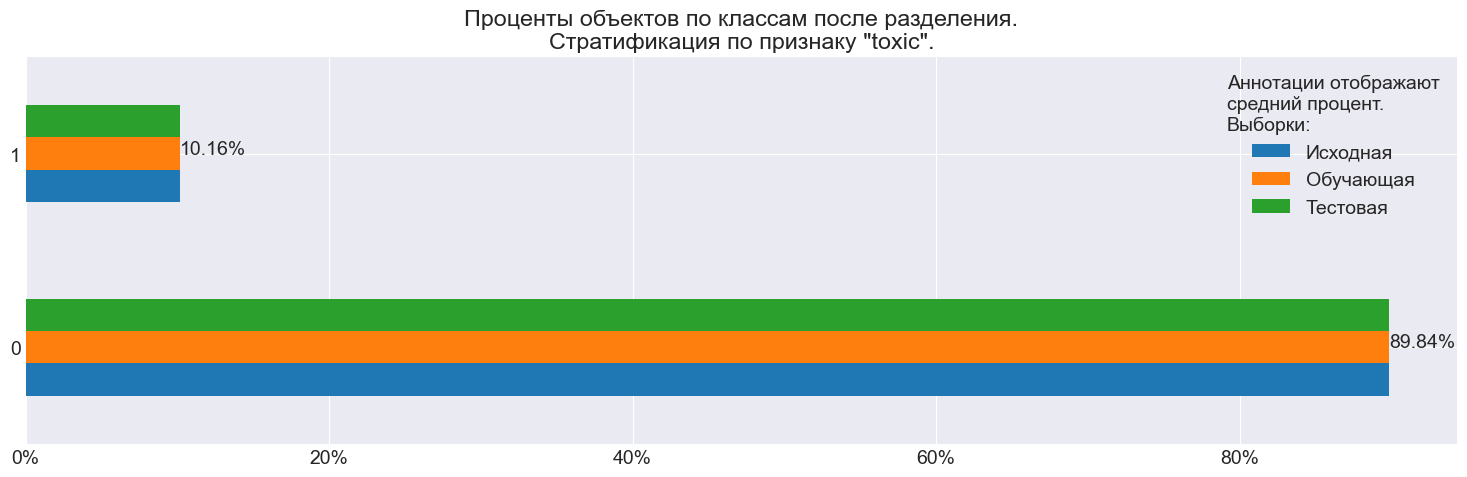

  0%|          | 0/4 [00:00<?, ?it/s]

,Ресемплинг,Тип представления,N-граммы,Значения меры F1,Оценка AUC-ROC,Время обучения (сек)
0,-,CountVectorizer,униграммы и биграммы,0.789600,0.997300,3.110000
1,даунсемплинг,CountVectorizer,униграммы и биграммы,0.703500,0.967700,3.110000
2,-,TfidfVectorizer,униграммы,0.748400,0.959400,3.110000
3,даунсемплинг,TfidfVectorizer,униграммы,0.685700,0.921400,3.110000


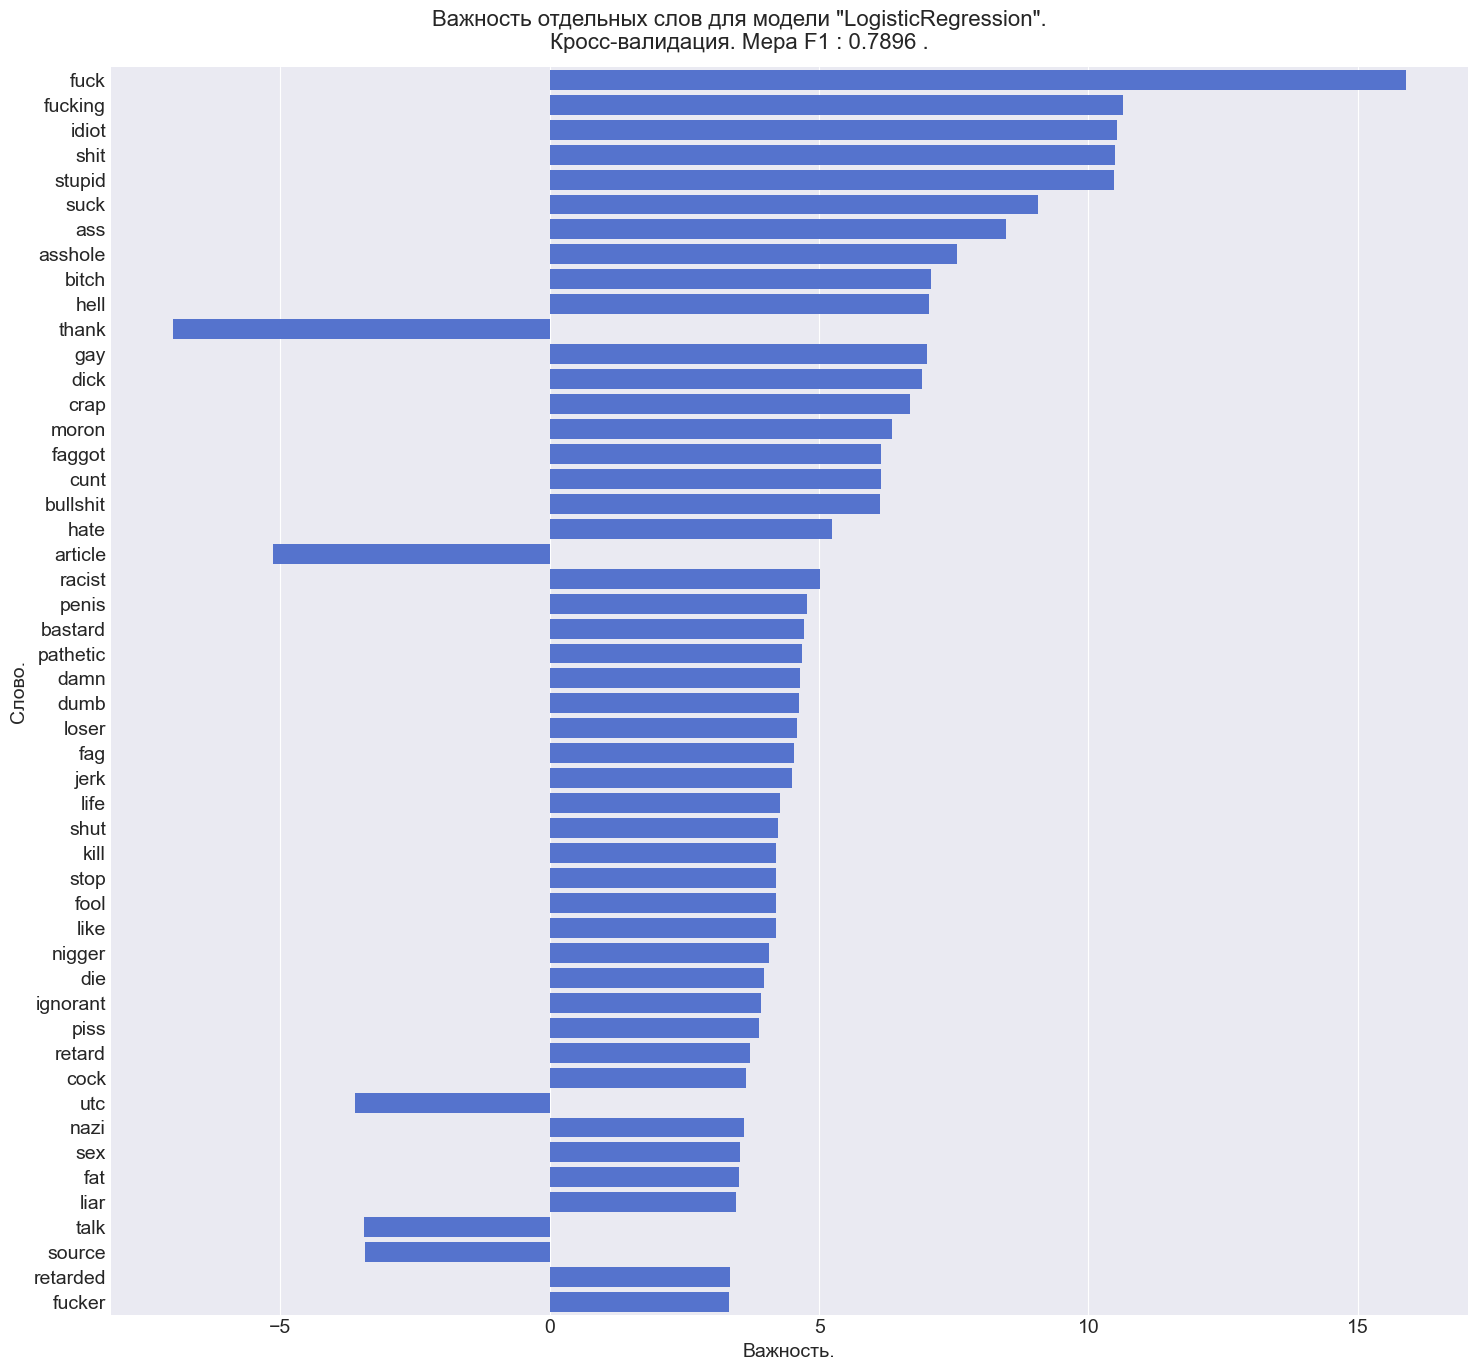

CPU times: total: 2min 41s
Wall time: 8min 23s


In [24]:
%%time
# Выделение выборок.
(X_train, X_test,
 y_train, y_test) = tvt_strat_split(df[['text_lemm', 'toxic']], 
                                    test_size=.1)

# Пайплайн для мешка слов.
lr_pipe_bow = Pipeline(steps=[
    ('reshape', FunctionTransformer(lambda x: x.squeeze())),
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(random_state=SEED))
])

lr_pipe_bow_under = Pipeline_imb(steps=[
    ('undersample', RandomUnderSampler(sampling_strategy='majority', 
                                       random_state=SEED)),
     ('reshape', FunctionTransformer(lambda x: x.squeeze())),
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(random_state=SEED))
])

# Пайплайн для TfIdf.
lr_pipe_tfidf = Pipeline(steps=[
    ('reshape', FunctionTransformer(lambda x: x.squeeze())),
    ('vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression(random_state=SEED))
])

# Пайплайн для TfIdf c ресемплингом.
lr_pipe_tfidf_under = Pipeline_imb(steps=[
    ('undersample', RandomUnderSampler(sampling_strategy='majority', 
                                       random_state=SEED)),
    ('reshape', FunctionTransformer(lambda x: x.squeeze())),
    ('vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression(random_state=SEED))
])

# Словарь параметров для перебора.
param_grid = dict(vectorizer__ngram_range = [(1, 1), (1, 2), (2, 2)], 
                  lr__class_weight = ['balanced'],
                  lr__max_iter = [5000],
                  lr__solver = ['lbfgs'])

lr_best = test_stand_lr(X_train, y_train,
                        param_grid=param_grid,
                        lr_pipe_list=[lr_pipe_bow, lr_pipe_bow_under,
                                      lr_pipe_tfidf, lr_pipe_tfidf_under])

#### Логистическая регрессия с эмбеддингами.

- Выделим выборки для кросс-валидации и теста.
- Проверим результат.
- Зададим пайплайн и гиперпараметры для перебора.
- Обучим и подберём лучшую модель для эмбеддингов.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,768
Обучающая выборка:,143362,90.0%,768
Тестовая выборка:,15930,10.0%,768


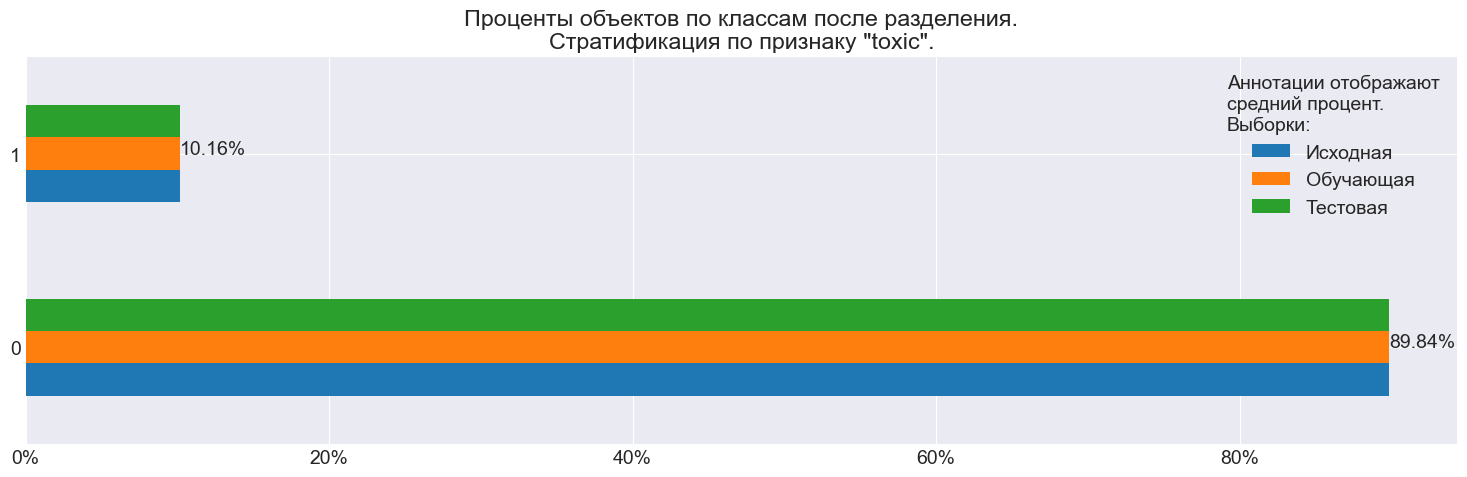

  0%|          | 0/1 [00:00<?, ?it/s]

,Ресемплинг,Тип представления,N-граммы,Значения меры F1,Оценка AUC-ROC,Время обучения (сек)
0,-,-,эмбеддинги / признаки toxic-bert,0.747800,0.834100,135.410000


In [25]:
(X_train, X_test,
 y_train, y_test) = tvt_strat_split(df_embeddings,
                                                test_size=.1)

# Словарь параметров для эмбеддингов.
param_grid_embed = dict(lr__class_weight = ['balanced', None],
                        lr__max_iter = range(1000, 5001, 2000),
                        lr__solver = ['liblinear'])

# Пайплайн для эмбеддингов.
lr_pipe_embed = Pipeline(steps=[
    ('lr', LogisticRegression(random_state=SEED))
])

lr_best_embed = test_stand_lr(X_train, y_train,
                              param_grid=param_grid_embed,
                              lr_pipe_list=[lr_pipe_embed])

<a id ='experiment'></a>

#### Логичстическая регрессия: эмбеддинги и  __toxic-bert__.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,775
Обучающая выборка:,143362,90.0%,775
Тестовая выборка:,15930,10.0%,775


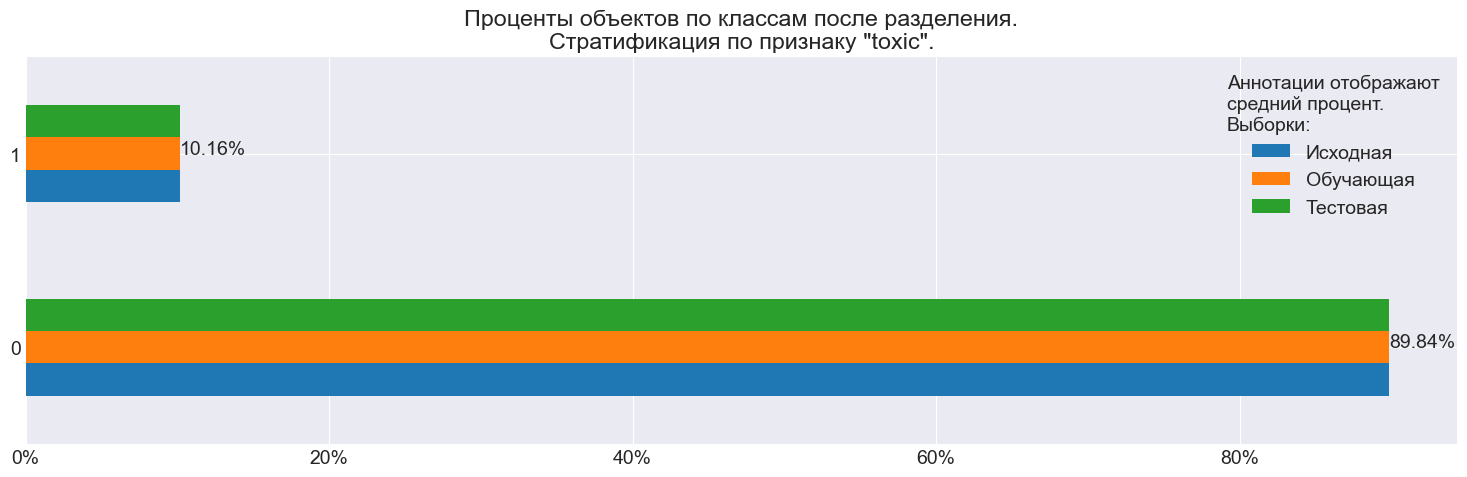

  0%|          | 0/1 [00:00<?, ?it/s]

,Ресемплинг,Тип представления,N-граммы,Значения меры F1,Оценка AUC-ROC,Время обучения (сек)
0,-,-,эмбеддинги / признаки toxic-bert,0.911200,0.976200,100.900000


In [26]:
df_embeddings.columns = df_embeddings.columns.astype(str)
(X_train, X_test,
 y_train, y_test) = tvt_strat_split(
    df_detoxify_preds.merge(df_embeddings, how='left', 
                            on=df_detoxify_preds.index),
    test_size=.1)

# Словарь параметров для эмбеддингов.
param_grid_embed_and_detox = dict(lr__class_weight = ['balanced', None],
                                  lr__max_iter = range(1000, 5001, 2000),
                                  lr__solver = ['liblinear'])

# Пайплайн для эмбеддингов.
lr_pipe_embed_and_detox = Pipeline(steps=[
    ('lr', LogisticRegression(random_state=SEED))
])

lr_best_embed_and_detox = test_stand_lr(
    X_train, y_train,
    param_grid=param_grid_embed_and_detox,
    lr_pipe_list=[lr_pipe_embed_and_detox]
)

#### Логичстическая регрессия: __toxic-bert__.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,6
Обучающая выборка:,143362,90.0%,6
Тестовая выборка:,15930,10.0%,6


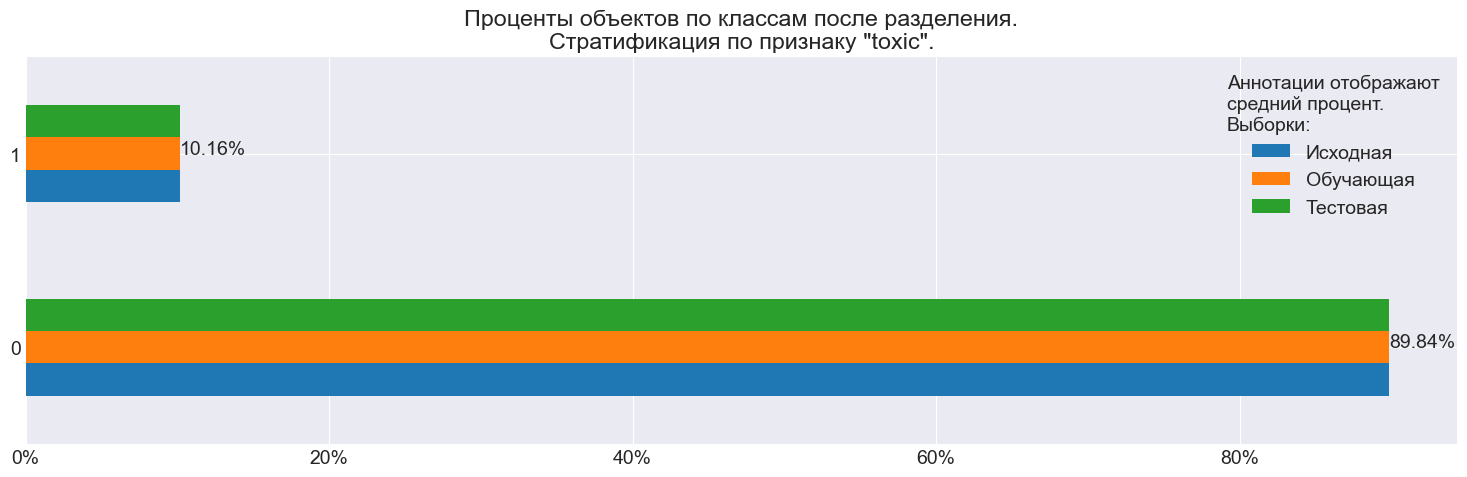

  0%|          | 0/1 [00:00<?, ?it/s]

,Ресемплинг,Тип представления,N-граммы,Значения меры F1,Оценка AUC-ROC,Время обучения (сек)
0,-,-,эмбеддинги / признаки toxic-bert,0.925700,0.952500,0.530000


In [27]:
df_detoxify_preds['toxic'] = df.toxic
(X_train, X_test,
 y_train, y_test) = tvt_strat_split(df_detoxify_preds, test_size=.1)

# Словарь параметров для эмбеддингов.
param_grid_detox = dict(lr__class_weight = ['balanced', None],
                        lr__max_iter = range(1000, 5001, 2000),
                        lr__solver = ['liblinear'])

# Пайплайн для эмбеддингов.
lr_pipe_detox = Pipeline(steps=[
    ('lr', LogisticRegression(random_state=SEED))
])

lr_best_detox = test_stand_lr(X_train, y_train,
                              param_grid=param_grid_detox,
                              lr_pipe_list=[lr_pipe_detox])

#### Логистическая регрессия. Вывод.

- Была произведена кросс-валидация пайплайнов с отметкой о дисбалансе классов в гиперпараметрах логистической регрессии.
  - Пайплайн с векторизацией методом "мешка слов" показал лучший, возможно, переоценённый результат. Сработала комбинация униграмм и биграмм.
  - Пайплайн с векторизацией __TF-IDF__ показал результат хуже, чем "мешок слов". Возможно, это обусловлено разнящейся длиной текстов и дисбалансом классов.
  - Пайплайн с даунсемплингом класса `0` не дал удовлетворительного прироста метрики и, в данном случае, не является эффективным методом преодоления дисбаланса классов.
  - Пайплайн с эмбеддингами показал худший результат, что, возможно, говрит о необходимости дообработки данных и перестроении или более тонкой настройке эмбеддингов.
- Для улучшения оценки модели необходимо дообработать данные.

### Градиентный бустинг `CatBoostClassifier`.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
 - Зададим функцию подбора гиперпараметров для модели.
 - Выделим валидационную и тестовую выборки размерами $10\%$ каждая.
 - Обучим модель с различной скоростью обучения и проверим полезность созданного признака с оценкой агрессивности текста.

#### Функция обучения CatBoost.

Создадим функцию, которая
- примет обучающую и валидационную выборки и гиперпараметры для перебора;
- протестирует различные кол-ва деревьев и скорости обучения;
- выведет результаты и оценку лучшей модели.

In [28]:
# Функция обучения CatBoost.
def cat_test_stand(train_pool : 'catboost.core.Pool' = None, 
                   eval_pool : 'catboost.core.Pool' = None, 
                   cat_params : dict = None,
                   return_res : bool = True,
                   seed : any = SEED) -> list:
    score_best = 0
    cat_params_ = {}
    for i, v_ in enumerate(product(*cat_params.values())):
        cat_params_.update({k : v for k, v in zip(cat_params.keys(), v_)})

        model = CatBoostClassifier(
            **cat_params_,
            eval_metric='F1',
            task_type='GPU' if torch.cuda.is_available() else 'CPU',
            od_type = 'Iter',
            use_best_model=True,
            random_state=seed
        )        
        
        timing = perf_counter()
        model.fit(train_pool, eval_set=eval_pool)
        timing = perf_counter() - timing
        
        # Запишем лучшие оценки и параметры.
        rocauc = roc_auc_score(y_val, model.predict(X_val))
        if model.best_score_['validation']['F1'] > score_best:
            score_best = model.best_score_['validation']['F1']
            params_best = model.get_params()
            rocauc_best = rocauc
            
    # Запишем финальную оценку и параметры.
    res = [score_best, params_best, round(timing, 2), rocauc]
    print('\n\033[1mОценка F1 лучшей модели на валидационной выборке: '+
          f'{score_best:.4f}.')
    print('\033[1mОценка AUC-ROC лучшей модели на валидационной выборке: '+
          f'{rocauc_best:.4f}.')
    print(f'\033[1mВремя обучения: {round(timing, 2)} сек.\033[0m')
    
    if return_res: return res, model

####  Обучение градиентного бустинга  без доп. признака.
- Вызовем функцию и выделим выборки для CatBoost c перезаписью переменных без дополнительного признака оценки агрессии текста.
- Проверим результат.
- Зададим пулы CatBoost, - оптимизированный формат хранения данных.
- Зададим гиперпараметры для перебора.
- Вызовем функцию, обучим модель и выведем результат.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,1
Обучающая выборка:,127432,80.0%,1
Валидационная выборка:,15930,10.0%,1
Тестовая выборка:,15930,10.0%,1


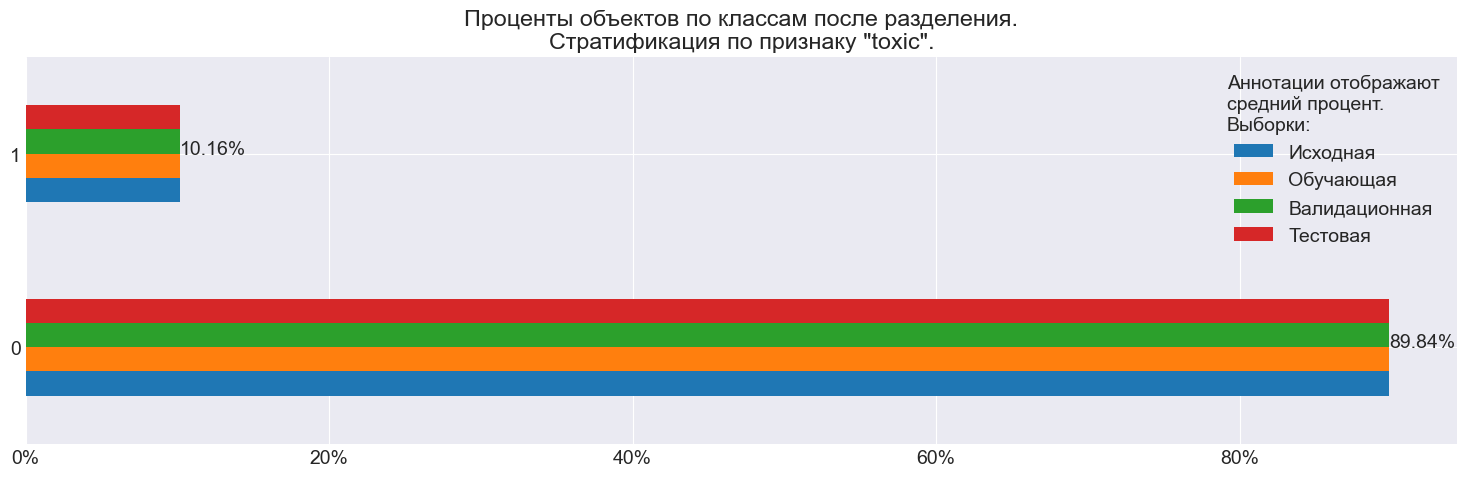

  0%|          | 0/12 [00:00<?, ?it/s]


Оценка F1 лучшей модели на валидационной выборке: 0.8928.
Оценка AUC-ROC лучшей модели на валидационной выборке: 0.8965.
Время обучения: 4.56 сек.
CPU times: total: 2min 3s
Wall time: 57.8 s


In [29]:
%%time
(X_train, X_val, X_test,
 y_train, y_val, y_test) = tvt_strat_split(df.drop('offense_score', axis=1), 
                                           test_size=.1, val_size=.1)

# Зададим пул catboost.
train_pool = Pool(data=X_train, label=y_train, text_features=['text_lemm'])
valid_pool = Pool(data=X_val, label=y_val, text_features=['text_lemm'])
test_pool = Pool(data=X_test, label=y_test, text_features=['text_lemm'])

# Вызовем функцию и оценим модель.
cat_params = dict(depth = range(4, 10, 1),
                  iterations = range(100, 500, 1000),
                  learning_rate = [.01, .02],
                  auto_class_weights = ['Balanced'],
                  silent=[True])

cat_best, cat_model = cat_test_stand(train_pool, valid_pool, cat_params)

#### Градиентный бустинг. Предварительный вывод.
- Модель без тонкой настройки показывает значение целевой метрики гораздо выше порогового и выше, чем у лучшей логистической регрессии. Возможно, модель переобучена.
- Проверим метрики на выборке с включённым дополнительным признаком.

#### Обучение градиентного бустинга с доп. признаком.

- Вызовем функцию и выделим выборки для CatBoost c перезаписью переменных с дополнительным признаком оценки агрессии текста.
- Проверим результат.
- Обучим модель и проверим метрики.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,2
Обучающая выборка:,127432,80.0%,2
Валидационная выборка:,15930,10.0%,2
Тестовая выборка:,15930,10.0%,2


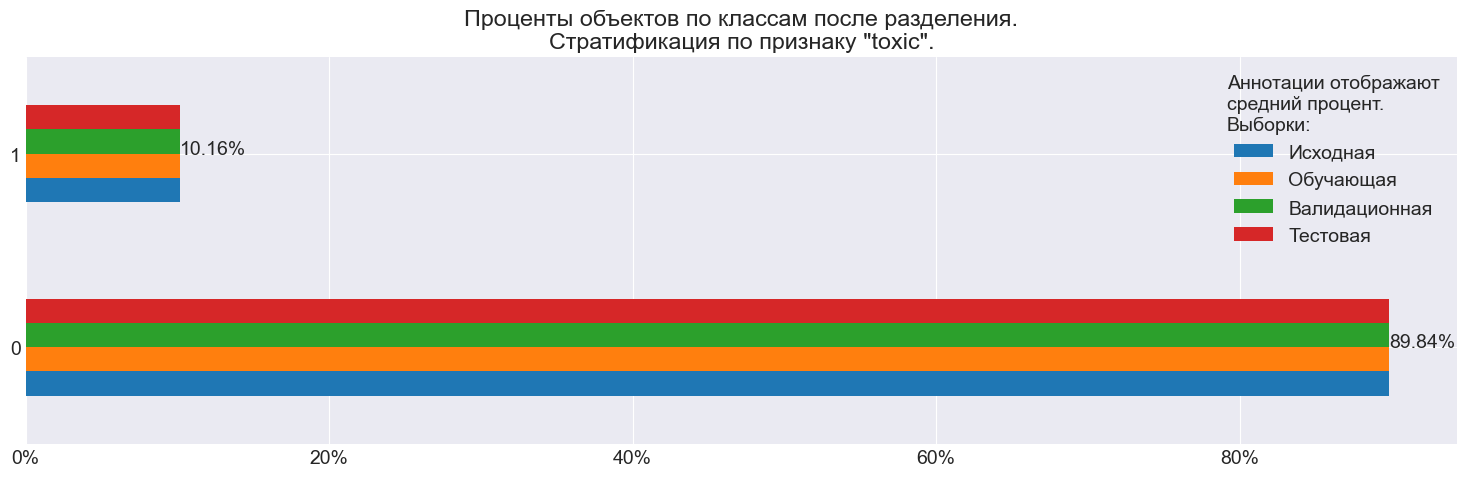

  0%|          | 0/12 [00:00<?, ?it/s]


Оценка F1 лучшей модели на валидационной выборке: 0.8975.
Оценка AUC-ROC лучшей модели на валидационной выборке: 0.8993.
Время обучения: 4.54 сек.
CPU times: total: 2min 3s
Wall time: 56 s


In [30]:
%%time
(X_train, X_val, X_test,
 y_train, y_val, y_test) = tvt_strat_split(df,test_size=.1, val_size=.1)

# Зададим пул catboost.
train_pool = Pool(data=X_train, label=y_train, text_features=['text_lemm'])
valid_pool = Pool(data=X_val, label=y_val, text_features=['text_lemm'])
test_pool = Pool(data=X_test, label=y_test, text_features=['text_lemm'])

# Вызовем функцию и оценим модель.
cat_params = dict(depth = range(4, 10, 1),
                  iterations = range(100, 500, 1000),
                  learning_rate = [.01, .02],
                  auto_class_weights = ['Balanced'],
                  silent=[True])

cat_best_extra, cat_model_extra = cat_test_stand(train_pool, 
                                                 valid_pool, 
                                                 cat_params)

#### Обучение на выборке со всеми доп. признаками.

- Объединим эмбеддинги и датафрейм с текстом и оценкой агрессивности.
- Проверим результат.
- Вызовем функцию, выделим выборки для CatBoost c перезаписью переменных и проверим результат.
- Обучим модель без формирования пула, т.к. за отведённое на проект время успешно передать в пул индекс `embedding_features` не удалось. 
- Проверим метрики.

In [31]:
df_all = df.merge(df_embeddings.drop('toxic', axis=1), 
                  on=df.index, 
                  how='left').drop('key_0', axis=1)
display(df_all.shape)
display(df_all.columns)

(159292, 771)

Index(['toxic', 'text_lemm', 'offense_score', '0', '1', '2', '3', '4', '5',
       '6',
       ...
       '758', '759', '760', '761', '762', '763', '764', '765', '766', '767'],
      dtype='object', length=771)

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,770
Обучающая выборка:,127432,80.0%,770
Валидационная выборка:,15930,10.0%,770
Тестовая выборка:,15930,10.0%,770


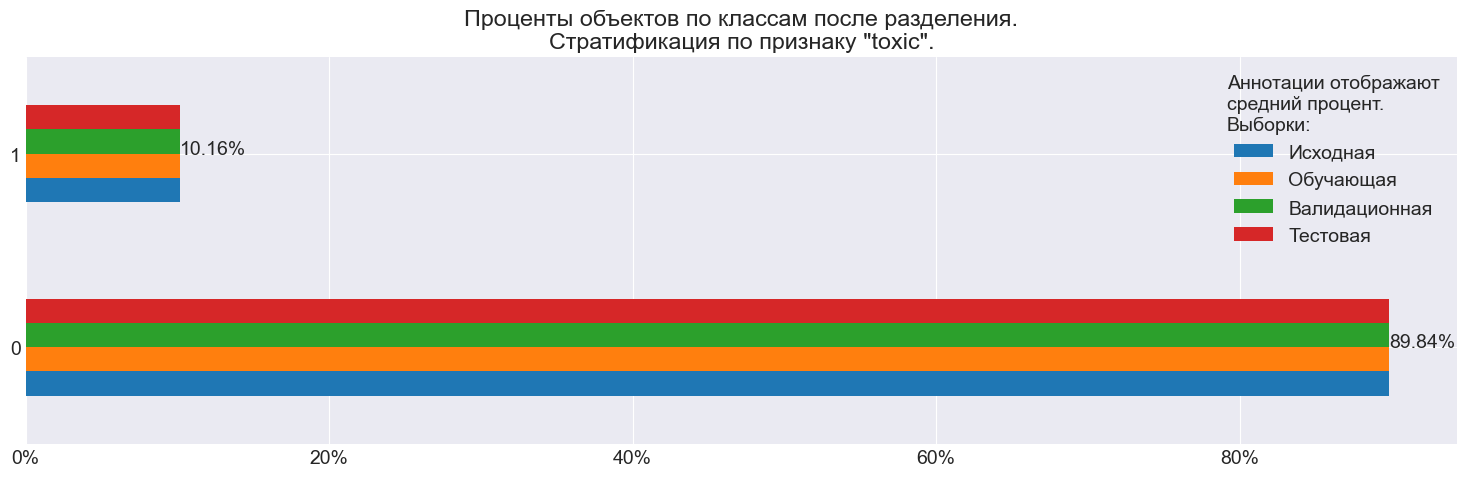

Learning rate set to 0.025822
0:	learn: 0.8730032	total: 218ms	remaining: 3m 37s
500:	learn: 0.9265947	total: 15s	remaining: 15s
999:	learn: 0.9407610	total: 28.9s	remaining: 0us
Лушая оыенка F1: 0.7350976997279248
Лушая оыенка AUC-ROC: 0.9261532689363422
CPU times: total: 1min 19s
Wall time: 37 s


In [32]:
%%time
(X_train_embed, X_val_embed, X_test_embed,
 y_train_embed, y_val_embed, y_test_embed) = tvt_strat_split(df_all,
                                                             test_size=.1, 
                                                             val_size=.1)

cat_model_all = CatBoostClassifier(
    depth=6, eval_metric='F1', 
    task_type='GPU' if torch.cuda.is_available() else 'CPU', 
    auto_class_weights = 'Balanced', iterations=1000, verbose=500, 
    text_features=['text_lemm'],
    random_state=SEED)

cat_all_timing = perf_counter()
cat_model_all.fit(X_train_embed, y_train_embed)
cat_all_timing = perf_counter() - cat_all_timing

cat_all_f1 = f1_score(y_val_embed, cat_model_all.predict(X_val_embed))
cat_all_rc = roc_auc_score(y_val_embed, cat_model_all.predict(X_val_embed))

print(f'Лушая оыенка F1: {cat_all_f1}')
print(f'Лушая оыенка AUC-ROC: {cat_all_rc}')

#### Градиентный бустинг. Вывод.
- Модель показала лучший результат, но явно переобучилась и непригодна для тестирования, т.к. оценка на валидационной выборке, как и, предположительно, у других моеделй градиентного бустинга на тестовой, ниже пороговой.
- Данные модели требуют донастройки.
- Добавленный признак позитивно повлиял на меру $F1$ и повысил объяснительную способность модели, что косвенно говорит о возможности улучшить качество модели дообработкой исходных данных, т.к.в них уже есть информация подчёркнутая добавленным признаком оценки агрессивности выражений в тексте.
- Возможности улучшения качества модели:
  - Дополнительная обработка данных.
  - Возможна более тонкая настройка модели.

### Обучение. Вывод.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
 
- Были обучены несколько вариаций двух моделей: `CatboostClassifier` и `LopgisticRegression`.
- Обе модели показали валидационную оценку целевой метрики выше пороговой, но `CatBoost` переобучился и непригоден для тестов в текущей конфигурации.
- Лучшая модель - `LogisticRegression` обученная на признаках __toxic-bert__.
- Выведем результаты подбора моделей.
 

,Мера F1,Оценка AUC-ROC,Время обучения (сек.)
CatboostClassifier,0.897500,0.899300,4.540000
CatboostClassifier c эмбеддингами,0.735100,0.926200,35.042000
LogisticRegression,0.789600,0.997300,3.110000
LogisticRegression c эмбеддингами,0.747800,0.834100,135.410000
LogisticRegression с эмбеддингами и detox-bert,0.911200,0.976200,100.900000
LogisticRegression с detox-bert,0.925700,0.952500,0.530000


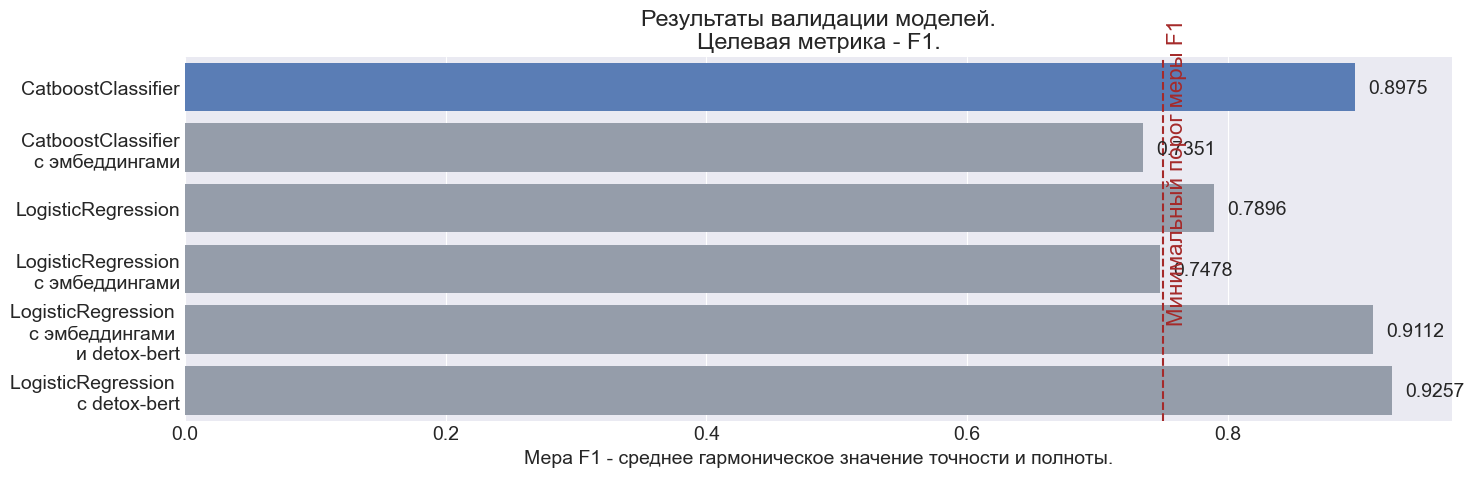

In [33]:
# Соберём результаты.
modeling_res = pd.DataFrame({
    'Мера F1' : np.round([cat_best_extra[0], 
                          cat_all_f1, 
                          lr_best[0],
                          lr_best_embed[0], 
                          lr_best_embed_and_detox[0], 
                          lr_best_detox[0]],4), 
    'Оценка AUC-ROC' : np.round([cat_best_extra[3], 
                                 cat_all_rc, 
                                 lr_best[3], 
                                 lr_best_embed[3],
                                 lr_best_embed_and_detox[3], 
                                 lr_best_detox[3]],4), 
    'Время обучения (сек.)' : np.round([cat_best_extra[2], 
                                        cat_all_timing, 
                                        lr_best[2], 
                                        lr_best_embed[2],
                                        lr_best_embed_and_detox[2], 
                                        lr_best_detox[2]],4)
},index=['CatboostClassifier', 'CatboostClassifier\nc эмбеддингами', 
         'LogisticRegression', 'LogisticRegression\nc эмбеддингами',
         'LogisticRegression \nс эмбеддингами \nи detox-bert',
         'LogisticRegression \nс detox-bert'])

# Выведем результаты.
display(modeling_res
        .style
        .set_caption('Рещультаты валидации моделей.')
        .set_table_styles(styles))
palette = np.append(['#4b79c4'], 
                    ['#929cad' for _ in range(modeling_res.shape[0] - 1)])

ax = sns.barplot(x=modeling_res['Мера F1'], y=modeling_res.index, palette = palette)
ax.set_title('Результаты валидации моделей.\nЦелевая метрика - F1.')
ax.set_xlabel('Мера F1 - среднее гармоническое значение точности и полноты.')
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width() + .01, p.get_y() + .5))
plt.axvline(.75, linestyle = '--', color='brown')
plt.text(.753, 1.4, s = 'Минимальный порог меры F1', fontsize=16, color='brown', rotation = 'vertical', 
         horizontalalignment = 'left', verticalalignment = 'center')
plt.show();

## Тестирование.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
Лучшей моделью оказалась предобученная __toxic-bert__. Протестируем её.

,Кол-во объектов.,Процент объектов.,Кол-во признаков.
Исходный датафрейм:,159292,100.0%,6
Обучающая выборка:,143362,90.0%,6
Тестовая выборка:,15930,10.0%,6


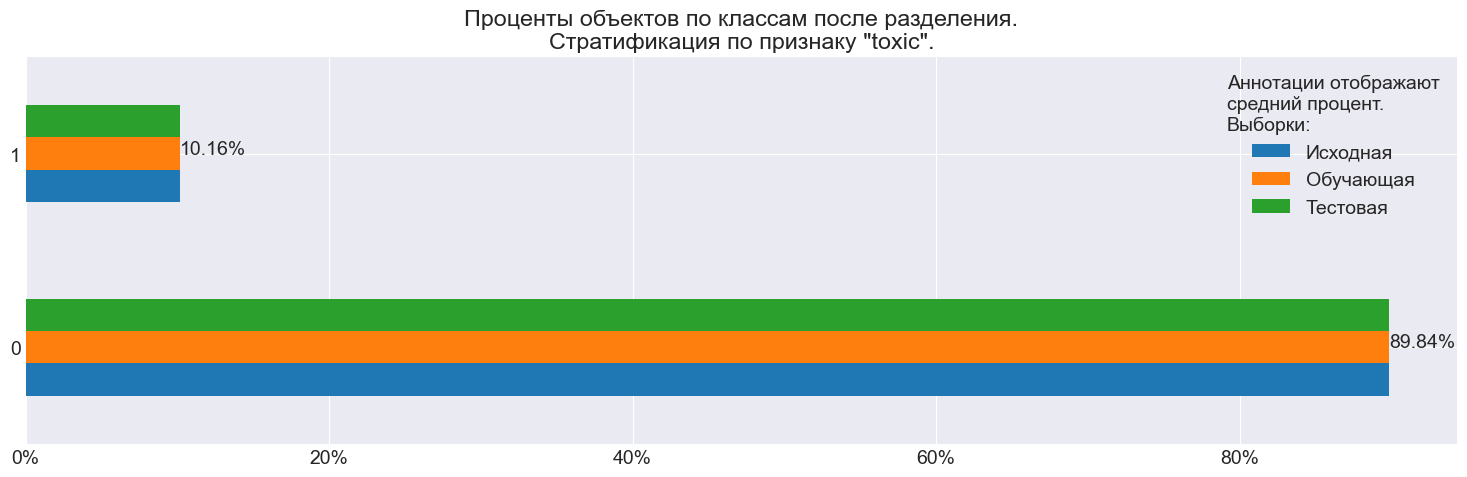

In [34]:
(X_train, X_test,
 y_train, y_test) = tvt_strat_split(df_detoxify_preds, test_size=.1)

,Модель,f1 мера,AUC-ROC,Время обучения,Время предсказания,Точность,Полнота
0,LogisticRegression,0.927318,0.953823,0.235747,0.002145,0.994000,0.990000


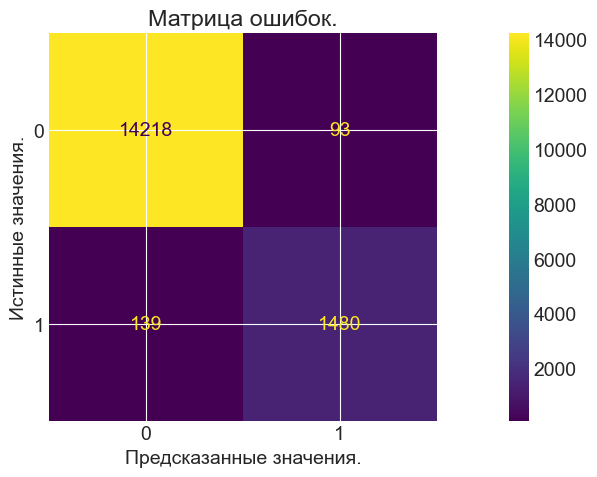

CPU times: total: 516 ms
Wall time: 482 ms


In [35]:
%%time
# Обучение и предсказание.
model_final = lr_pipe_detox
model_final.set_params(**lr_best_detox[1])
train_time = perf_counter()
model_final.fit(X_train, y_train)
train_time = perf_counter() - train_time
predict_time = perf_counter()
preds = model_final.predict(X_test)
predict_time = perf_counter() - predict_time


# Вывод оценок и графиков.
f1_test = f1_score(y_test, preds)
auc_roc_test = roc_auc_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)

# Вычисление метрик.
tp = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tn = conf_matrix[1][1]
precis_test = round(tp / (tp + fp), 3)
recall_test = round(tp / (tp + fn), 3)

print('\n\n')
display(
    pd.DataFrame(['LogisticRegression', f1_test, auc_roc_test, 
                  train_time, predict_time, precis_test, recall_test],
                 index = ['Модель', 'f1 мера', 'AUC-ROC', 'Время обучения', 
                          'Время предсказания', 'Точность', 'Полнота']).T
    .style
    .set_caption('Показатели финальной модели.')
    .set_table_styles(styles)
)

# Вывод матрицы ошибок.
ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=model_final.classes_
).plot()
plt.title('Матрица ошибок.')
plt.xlabel('Предсказанные значения.')
plt.ylabel('Истинные значения.')
plt.show();

### Тестирование. Вывод.

 <a href='#table_of_contents'>К содержанию.</a>

 ---
 
- __toxic-bert__ показала блестящий результат, в большой степени, наверное, потому что обучалась на нашем расширенном датасете в оригинальных соревнованиях, или на очень похожем.
- Кажется, подбор порога отсечения и бинаризация значений в признаке <code>toxicity</code>, который создаёт __toxic_bert__, может дать результат не хуже. Но работа проделана не зря: проект учебный :).

In [36]:
# Замерим время выполнения ноутбука.
notebook_time_total = perf_counter() - notebook_time_start
print(f'Общее время выполнения ноутбука ≈ {notebook_time_total / 60:.0f} мин.')

Общее время выполнения ноутбука ≈ 42 мин.


## Выводы.

<a href='#table_of_contents'>К содержанию.</a>

---

- __Итог.__<br>
Была использована модель оценки токсичности комментариев __toxic-bert__ и применена логистическая регрессия со следующими параметрами:
  - __Модель:__ `LogisticRegression`;
  - __Мера__ $F1$ $≈0.93$
  - __Мера__ $AUC-ROC$ $≈0.95$
  - Гиперпараметры финальной модели:
    - веса классов: сбалансированы;
    - максимальное число итераций: $1000$;
    - время обучения: $≈0.24$ сек.;
    - Время предсказания: $≈0.0019$ сек.;
    - Размер обучающей/тестовой выборок: $90\%/10\%$.

- __Задача МО.__
  - Задача машинного обучения - бинарная классификация текста с оптимизацией метрики $F1$.

- __Данные.__
  - Данные представлены двумя признаками: 
    - содержащим текстовые записи признаком `text`, 
    - и разметкой токсичности - признаком `toxicity`. <br>
  - Также в данных присутствует столбец с порядковыми номерами объектов, который был удалён, т.к. он не несёт полезной информации.
  - В данных содержится $159292$ объекта.
  - Были очищены текстовые объекты и приведены сокращённые формы:
    - удалены ссылки, разметка CSS и HTML и пр.;
	- удалены именные тэги @ и имёна следующие за ними, а также спецразметка типа Wikipedia_talk:WikiProject_ и пр.;
	- приведены стандартные сокращения англ. языка типа  "𝑐𝑎𝑛′𝑡";
	- удалены повторения символов более  2, т.к. в английском языке таких повторов нет.
  - Был проверен основной язык датасета - английский.
  
- __Дополнение данных.__<br>
Был добавлен признак с оценкой агрессивности выражений в текстах.
  
- __Целевой признак.__
  - Целевой признак бинарен.
  - Классы несбалансированы, что было учтено при выделении  выборок и моделировании:
    - негативных/токсичных объектов, принадлежащих классу `1`: 16186;
    - позитивных объектов, принадлежащих классу `0`: 143106.
  
- __Пропуски и дубликаты.__
  - Пропусков и явных дубликатов в данных не обнаружено.
  
- __Моделирование.__<br>
  - Была использована модель __toxic-bert__.
  - Были обучены модели:
    - Логистическая регрессия `LogisticRegression`
      - c векторизацией методом "мешок слов";
      - c векторизацией __TF-IDF__;
      - c понижающим ресемплированием класса `0` и веторизацией __TF-IDF__;
      - c использованием эмбеддингов `DistilBERT`.
    - Градиентный бустинг `CatBoostClassifier`
      - c различными гиперпараметрами;
      - c использованием дополнительного признака оценки агрессивности;
      - c использованием эмбеддингов `DistilBERT`.

- __Возможные улучшения.__
  - дополнительная очистка и обработка данных;
  - усиление логистической регрессии признаком оценки агрессивности;
  - донастройка эмбеддингов и классификация нейронной сетью;
  - подача эмбеддингов в `CatBoostClassifier` в качестве признака и более тонкая настройка данной модели;
  - ансамбль из классифицирующих моделей с финальной оценкой алгоритмом бустинга. 